
# **Web scraping, transformación de datos, y análisis exploratorio de datos.**



# **Caso práctico**
***Análisis de mercado para la apertura de centros especializados de Halterofilia***

***Lift & Lead***, es una startup interesada en abrir centros de entrenamiento especializados en halterofilia ya que con el auge del CrossFit, que integra técnicas de halterofilia, los fundadores creen que este puede ser un buen momento para invertir en centros dedicados exclusivamente a este deporte.

La dirección de ***Lift & Lead*** busca validar la hipótesis de que la popularidad del CrossFit está impulsando el interés por la halterofilia en Europa.

Actualmente no cuentan con mucho conocimiento y para empezar a comprender mejor el sector de la halterofilia y a sus atletas, te han asignado la tarea de analizar los resultados de los campeonatos europeos de halterofilia.

El análisis se hará en dos fases:

1. **Fase 1**: Te han proporcionado acceso a la base de datos de 2019 y 2020
  - La información fue obtenida a través de los siguientes enlaces por el anterior Data Analyst que ha dejado la compañía:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2019
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2020

2. **Fase 2:** Quieren enriquecer el análisis consideranto un periodo más amplio, incluyendo desde 2019 a 2024 pero no disponen de la información. Para obtenerla harás uso de web scraping de los siguientes enlaces:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2021
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024

      **Importante:** Se deberá incluir al menos un año adicional de información


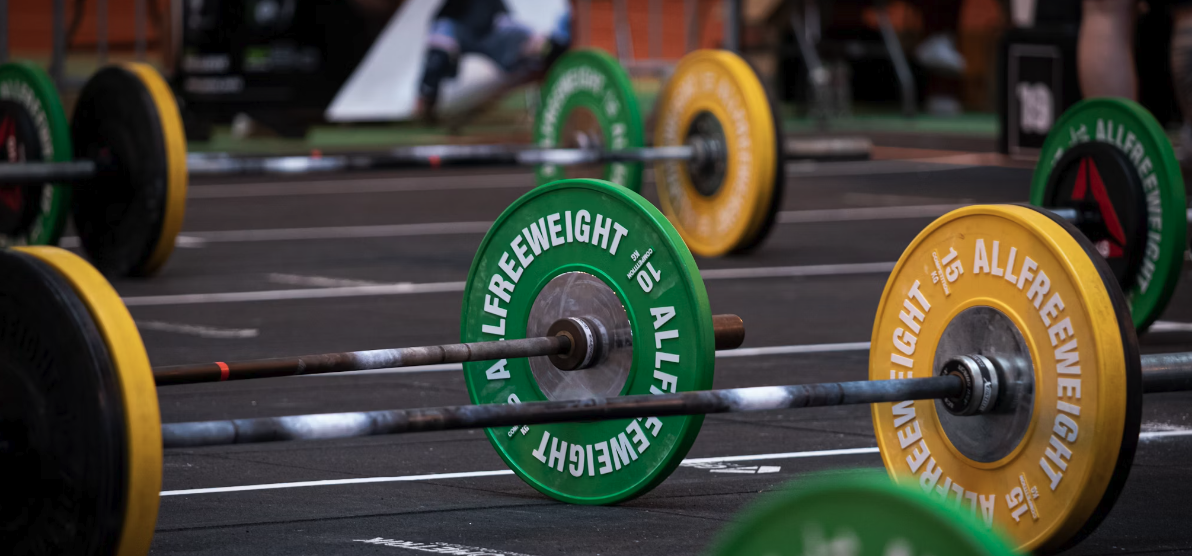

# **Parte 1.** Disponemos de la información

## Paso 1. Importar librerías

In [67]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Expresiones regulares
import re
from fuzzywuzzy import process

import warnings
warnings.filterwarnings('ignore')

## Paso 2. Cargar datos

In [68]:
# Rutas de los archivos
path = '/Users/sebasastre/Desktop/Nuclio Bootcamp Docs/Analisis exploratorio de datos/PROYECTO FINAL/'
file_2019 = 'Campeonato_Europeo_de_Halterofilia_de_2019_datos_original.csv'
file_2020 = 'Campeonato_Europeo_de_Halterofilia_de_2020_datos_original.csv'

# Leer los archivos CSV
df_2019 = pd.read_csv(path + file_2019)
df_2020 = pd.read_csv(path + file_2020)

# Concatenar los DataFrames
df = pd.concat([df_2019, df_2020], ignore_index=True)

El año 2020 no se realizó el campeonato de Halterofilia en Europa por la epidemia Covid-19, por lo tanto los datos de 2020 corresponden a los de 2021.

## Paso 3. Exploración inicial

In [69]:
print(df_2019.shape)
print(df_2020.shape)

(20, 6)
(20, 6)


In [70]:
df_2019.head()

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino


In [71]:
df_2020.head()

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,2020,Masculino
1,61 kg (04.04),Stilian Grozdev Bulgaria 136 + 160 = 296,Shota Mishvelidze Georgia 135 + 155 = 290,Ferdi Hardal Turquía 130 + 157 = 287,2020,Masculino
2,67 kg (05.04),Muhammed Özbek Turquía 145 + 178 = 323,Mirko Zanni Italia 148 + 170 = 318,Valentin Guenchev Bulgaria 138 + 177 = 315,2020,Masculino
3,73 kg (06.04),Daniyar İsmayilov Turquía 160 + 181 = 341,Marin Robu Moldavia 156 + 183 = 339,Briken Calja Albania 152 + 184 = 336,2020,Masculino
4,81 kg (07.04),Antonino Pizzolato Italia 164 + 206 = 370,Karlos Nasar Bulgaria 163 + 206 = 369,Ritvars Suharevs Letonia 157 + 190 = 347,2020,Masculino


In [72]:
df_2019.tail()

,Eventos,Oro,Plata,Bronce,Año,Genero
15,71 kg (10.04),Anastasiya Romanova Rusia 112 + 128 = 240,Emily Godley Reino Unido 93 + 123 = 216,Mădălina Molie Rumania 101 + 114 = 215,2019,Femenino
16,76 kg (11.04),Daria Naumava Bielorrusia 106 + 136 = 242,Lidia Valentín[2]​ España 108 + 133 = 241,Patricia Strenius Suecia 101 + 132 = 233,2019,Femenino
17,81 kg[n 2]​ (12.04),Nina Schroth Alemania 102 + 120 = 222,Anna Van Bellinghen Bélgica 103 + 118 = 221,Liana Guiurdzhian Armenia 97 + 120 = 217,2019,Femenino
18,87 kg (12.04),Xeniya Pasjina Rusia 110 + 132 = 242,Diana Mstiyeva Rusia 110 + 130 = 240,Sarah Fischer Austria 102 + 129 = 231,2019,Femenino
19,+87 kg (13.04),Tatiana Kashirina Rusia 146 + 185 = 331,Anastasiya Lysenko Ucrania 120 + 148 = 268,Emily Campbell Reino Unido 115 + 145 = 260,2019,Femenino


In [73]:
df_2020.tail()

,Eventos,Oro,Plata,Bronce,Año,Genero
15,71 kg (07.04),Emily Godley Reino Unido 98 + 129 = 227,Alessia Durante Italia 97 + 122 = 219,Raluca Olaru Rumania 98 + 120 = 218,2020,Femenino
16,76 kg (08.04),Iryna Deja Ucrania 113 + 135 = 248,Yana Sotiyeva Rusia 112 + 134 = 246,Anastasiya Romanova Rusia 111 + 132 = 243,2020,Femenino
17,81 kg (09.04),Alina Marushchak Ucrania 109 + 127 = 236,Gaëlle Nayo-Ketchanke Francia 100 + 131 = 231,Liana Guiurdzhian Armenia 98 + 129 = 227,2020,Femenino
18,87 kg (10.04),Daria Ajmerova Rusia 108 + 138 = 246,Elena Cîlcic Moldavia 107 + 138 = 245,Daria Riazanova Rusia 105 + 135 = 240,2020,Femenino
19,+87 kg (11.04),Emily Campbell Reino Unido 122 + 154 = 276,Anastasiya Lysenko Ucrania 116 + 136 = 252,Melike Günal Turquía 108 + 135 = 243,2020,Femenino


In [74]:
df_2019.sample(5)

,Eventos,Oro,Plata,Bronce,Año,Genero
10,45 kg (06.04),Şaziye Erdoğan Turquía 75 + 88 = 163[n 1]​,Ivana Petrova Bulgaria 69 + 89 = 158[n 1]​,Yuliya Asayonak Bielorrusia 69 + 81 = 150[n 1]​,2019,Femenino
7,102 kg (13.04),Dmytro Chumak Ucrania 175 + 216 = 391,Samvel Gasparian Armenia 168 + 209 = 377,Vadzim Straltsou Bielorrusia 170 + 206 = 376,2019,Masculino
13,59 kg (08.04),Rebeka Koha Letonia 101 + 120 = 221,Tatiana Aleyeva Rusia 94 + 120 = 214,Alexandra Kozlova Rusia 96 + 117 = 213,2019,Femenino
12,55 kg (07.04),Joanna Łochowska Polonia 87 + 112 = 199,Svetlana Yershova Rusia 90 + 108 = 198,Kristina Novitskaya Rusia 85 + 105 = 190,2019,Femenino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino


In [75]:
df_2020.sample(5)

,Eventos,Oro,Plata,Bronce,Año,Genero
19,+87 kg (11.04),Emily Campbell Reino Unido 122 + 154 = 276,Anastasiya Lysenko Ucrania 116 + 136 = 252,Melike Günal Turquía 108 + 135 = 243,2020,Femenino
3,73 kg (06.04),Daniyar İsmayilov Turquía 160 + 181 = 341,Marin Robu Moldavia 156 + 183 = 339,Briken Calja Albania 152 + 184 = 336,2020,Masculino
10,45 kg (03.04),Nadezhda Nguen Bulgaria 72 + 83 = 155[n 1]​,Ivana Petrova Bulgaria 67 + 85 = 152[n 1]​,Melisa Güneş Turquía 68 + 83 = 151[n 1]​,2020,Femenino
8,109 kg (10.04),Dmytro Chumak Ucrania 181 + 226 = 407,Jristo Jristov Bulgaria 186 + 220 = 406,Timur Naniyev Rusia 184 + 217 = 401,2020,Masculino
4,81 kg (07.04),Antonino Pizzolato Italia 164 + 206 = 370,Karlos Nasar Bulgaria 163 + 206 = 369,Ritvars Suharevs Letonia 157 + 190 = 347,2020,Masculino


In [76]:
df_2019

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino
5,89 kg (11.04),Hakob Mkrtchian Armenia 164 + 207 = 371,Revaz Davitadze Georgia 170 + 200 = 370,Davit Hovhannisian Armenia 165 + 195 = 360,2019,Masculino
6,96 kg (12.04),Yauheni Tsijantsou Bielorrusia 178 + 222 = 400,Yegor Klimonov Rusia 168 + 210 = 378,Anton Pliesnoi Georgia 173 + 204 = 377,2019,Masculino
7,102 kg (13.04),Dmytro Chumak Ucrania 175 + 216 = 391,Samvel Gasparian Armenia 168 + 209 = 377,Vadzim Straltsou Bielorrusia 170 + 206 = 376,2019,Masculino
8,109 kg (13.04),Simon Martirosian Armenia 192 + 235 = 427,Andrei Aramnau Bielorrusia 190 + 221 = 411,Rodion Bochkov Rusia 192 + 218 = 410,2019,Masculino
9,+109 kg (13.04),Lasha Talajadze Georgia 218 + 260 = 478,Irakli Turmanidze Georgia 206 + 241 = 447,Ruben Alexanian Armenia 195 + 245 = 440,2019,Masculino


In [77]:
# Renombrar la columna 'Genero' a 'Género' en df_2019
df_2019 = df_2019.rename(columns={'Genero': 'Género'})

# Renombrar la columna 'Genero' a 'Género' en df_2020
df_2020 = df_2020.rename(columns={'Genero': 'Género'})

## Paso 4. Crear un único dataframe con los datos de 2019 y 2020 (2020 es 2021)

In [78]:
# Concatenar los DataFrames
df_concat = pd.concat([df_2019, df_2020], ignore_index=True)
df_concat.sample(10)

,Eventos,Oro,Plata,Bronce,Año,Género
8,109 kg (13.04),Simon Martirosian Armenia 192 + 235 = 427,Andrei Aramnau Bielorrusia 190 + 221 = 411,Rodion Bochkov Rusia 192 + 218 = 410,2019,Masculino
22,67 kg (05.04),Muhammed Özbek Turquía 145 + 178 = 323,Mirko Zanni Italia 148 + 170 = 318,Valentin Guenchev Bulgaria 138 + 177 = 315,2020,Masculino
38,87 kg (10.04),Daria Ajmerova Rusia 108 + 138 = 246,Elena Cîlcic Moldavia 107 + 138 = 245,Daria Riazanova Rusia 105 + 135 = 240,2020,Femenino
11,49 kg (06.04),Elena Andrieș Rumania 87 + 103 = 190,Kristina Sobol Rusia 85 + 95 = 180,Giorgia Russo Italia 75 + 103 = 178,2019,Femenino
9,+109 kg (13.04),Lasha Talajadze Georgia 218 + 260 = 478,Irakli Turmanidze Georgia 206 + 241 = 447,Ruben Alexanian Armenia 195 + 245 = 440,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
16,76 kg (11.04),Daria Naumava Bielorrusia 106 + 136 = 242,Lidia Valentín[2]​ España 108 + 133 = 241,Patricia Strenius Suecia 101 + 132 = 233,2019,Femenino
30,45 kg (03.04),Nadezhda Nguen Bulgaria 72 + 83 = 155[n 1]​,Ivana Petrova Bulgaria 67 + 85 = 152[n 1]​,Melisa Güneş Turquía 68 + 83 = 151[n 1]​,2020,Femenino
15,71 kg (10.04),Anastasiya Romanova Rusia 112 + 128 = 240,Emily Godley Reino Unido 93 + 123 = 216,Mădălina Molie Rumania 101 + 114 = 215,2019,Femenino
39,+87 kg (11.04),Emily Campbell Reino Unido 122 + 154 = 276,Anastasiya Lysenko Ucrania 116 + 136 = 252,Melike Günal Turquía 108 + 135 = 243,2020,Femenino


In [79]:
df_concat['Eventos'].unique()

array(['55\xa0kg (06.04)', '61\xa0kg (07.04)', '67\xa0kg (08.04)',
       '73\xa0kg (09.04)', '81\xa0kg (10.04)', '89\xa0kg (11.04)',
       '96\xa0kg (12.04)', '102\xa0kg (13.04)', '109\xa0kg (13.04)',
       '+109\xa0kg (13.04)', '45\xa0kg (06.04)', '49\xa0kg (06.04)',
       '55\xa0kg (07.04)', '59\xa0kg (08.04)', '64\xa0kg (09.04)',
       '71\xa0kg (10.04)', '76\xa0kg (11.04)',
       '81\xa0kg[n 2]\u200b (12.04)', '87\xa0kg (12.04)',
       '+87\xa0kg (13.04)', '55\xa0kg (04.04)', '61\xa0kg (04.04)',
       '67\xa0kg (05.04)', '73\xa0kg (06.04)', '81\xa0kg (07.04)',
       '89\xa0kg (08.04)', '96\xa0kg (09.04)', '102\xa0kg (10.04)',
       '109\xa0kg (10.04)', '+109\xa0kg (11.04)', '45\xa0kg (03.04)',
       '49\xa0kg (03.04)', '59\xa0kg (05.04)', '64\xa0kg (06.04)',
       '71\xa0kg (07.04)', '76\xa0kg (08.04)', '81\xa0kg (09.04)',
       '87\xa0kg (10.04)', '+87\xa0kg (11.04)'], dtype=object)

In [80]:
df_concat.columns

Index(['Eventos', 'Oro', 'Plata', 'Bronce', 'Año', 'Género'], dtype='object')

In [81]:
df_concat.describe()

,Año
count,40.00000
mean,2019.50000
std,0.50637
min,2019.00000
25%,2019.00000
50%,2019.50000
75%,2020.00000
max,2020.00000


In [82]:
df_concat.dtypes

Eventos    object
Oro        object
Plata      object
Bronce     object
Año         int64
Género     object
dtype: object

## Paso 5. Transformar los datos

Transforma el DataFrame para tener las siguientes columnas: Eventos, Año, Genero, Medalla (que indica si es Oro, Plata o Bronce) y Atleta (que contiene la información del atleta correspondiente)

Formato inicial:

| Eventos | Oro | Plata | Bronce | Año | Género |
|---------|-----|-------|--------|-----|--------|

**¡Importante!**
El dataframe final debe tener este formato:

| Eventos | Año | Genero | Medalla | Atleta |
|---------|-----|-------|--------|-----|

In [83]:
# Utilizar la función melt para convertir las columnas 'Oro', 'Plata' y 'Bronce' en una única columna 'Medalla'
df_melted = df.melt(id_vars=['Eventos', 'Año', 'Genero'], 
                     value_vars=['Oro', 'Plata', 'Bronce'], 
                     var_name='Medalla', 
                     value_name='Atleta')

# Convertir la columna 'Medalla' a tipo category
df_melted['Medalla'] = df_melted['Medalla'].astype('category')

# Eliminar las filas con valores nulos en la columna 'Atleta'
df_melted = df_melted.dropna(subset=['Atleta'])

# Mostrar las primeras filas del DataFrame resultante
df_melted.sample(10)

,Eventos,Año,Genero,Medalla,Atleta
64,81 kg (07.04),2020,Masculino,Plata,Karlos Nasar Bulgaria 163 + 206 = 369
9,+109 kg (13.04),2019,Masculino,Oro,Lasha Talajadze Georgia 218 + 260 = 478
25,89 kg (08.04),2020,Masculino,Oro,Karen Avaguian Armenia 175 + 200 = 375
30,45 kg (03.04),2020,Femenino,Oro,Nadezhda Nguen Bulgaria 72 + 83 = 155[n 1]​
94,64 kg (09.04),2019,Femenino,Bronce,Zoe Smith Reino Unido 96 + 128 = 224
19,+87 kg (13.04),2019,Femenino,Oro,Tatiana Kashirina Rusia 146 + 185 = 331
117,81 kg (09.04),2020,Femenino,Bronce,Liana Guiurdzhian Armenia 98 + 129 = 227
28,109 kg (10.04),2020,Masculino,Oro,Dmytro Chumak Ucrania 181 + 226 = 407
53,59 kg (08.04),2019,Femenino,Plata,Tatiana Aleyeva Rusia 94 + 120 = 214
54,64 kg (09.04),2019,Femenino,Plata,Irina Lepșa Rumania 102 + 127 = 229


In [84]:
df_melted.dtypes

Eventos      object
Año           int64
Genero       object
Medalla    category
Atleta       object
dtype: object

In [85]:
# Reemplazar '2020' por '2021' en la columna 'Año'
df_melted['Año'] = df_melted['Año'].replace(2020, 2021)


In [86]:
df_melted.sample(5)

,Eventos,Año,Genero,Medalla,Atleta
97,81 kg[n 2]​ (12.04),2019,Femenino,Bronce,Liana Guiurdzhian Armenia 97 + 120 = 217
69,+109 kg (11.04),2021,Masculino,Plata,Gor Minasian Armenia 216 + 248 = 464
105,89 kg (08.04),2021,Masculino,Bronce,Andranik Karapetian Armenia 170 + 195 = 365
113,59 kg (05.04),2021,Femenino,Bronce,Dora Tchakounté Francia 95 + 115 = 210
58,87 kg (12.04),2019,Femenino,Plata,Diana Mstiyeva Rusia 110 + 130 = 240


In [87]:
# Reemplazar 'Reino Unido' por 'UK' en la columna 'Atleta'
df_melted['Atleta'] = df_melted['Atleta'].str.replace('Reino Unido', 'UK')

In [88]:
# Eliminar '[n 1]' en la columna 'Atleta'
df_melted['Atleta'] = df_melted['Atleta'].str.replace('\[n 1\]', '', regex=True)


In [89]:
# Eliminar '[2]' en la columna 'Atleta'
df_melted['Atleta'] = df_melted['Atleta'].str.replace('\[2]', '', regex=True)

In [90]:
# Eliminar '+' en la columna 'Atleta'
df_melted['Atleta'] = df_melted['Atleta'].str.replace('[+]', '', regex=True)

# Eliminar '=' en la columna 'Atleta'
df_melted['Atleta'] = df_melted['Atleta'].str.replace('[=]', '', regex=True)

# Eliminar '[n 2]' en la columna 'Eventos'
df_melted['Eventos'] = df_melted['Eventos'].str.replace('[n 2]', '', regex=True)

In [91]:
# Definir las columnas a limpiar
columns_to_clean = ['Eventos', 'Año', 'Genero', 'Medalla', 'Atleta']

# Convertir las columnas especificadas a tipo string
df_melted[columns_to_clean] = df_melted[columns_to_clean].astype(str)

# Eliminar corchetes vacíos de las columnas 'Eventos', 'Año', 'Género', 'Medalla' y 'Atleta'
for column in columns_to_clean:
    df_melted[column] = df_melted[column].str.replace(r'\[\]\u200b', '', regex=True)



In [92]:
df_melted.iloc[57]

Eventos                                   81 kg(1.04)
Año                                              2019
Genero                                       Femenino
Medalla                                         Plata
Atleta     Anna Van Bellinghen Bélgica  103  118  221
Name: 57, dtype: object

In [93]:
df_melted['Año'].dtypes

dtype('O')

In [94]:
df_melted['Eventos'].unique()

array(['55\xa0kg(06.04)', '61\xa0kg(07.04)', '67\xa0kg(08.04)',
       '73\xa0kg(09.04)', '81\xa0kg(10.04)', '89\xa0kg(11.04)',
       '96\xa0kg(1.04)', '10\xa0kg(13.04)', '109\xa0kg(13.04)',
       '+109\xa0kg(13.04)', '45\xa0kg(06.04)', '49\xa0kg(06.04)',
       '55\xa0kg(07.04)', '59\xa0kg(08.04)', '64\xa0kg(09.04)',
       '71\xa0kg(10.04)', '76\xa0kg(11.04)', '81\xa0kg(1.04)',
       '87\xa0kg(1.04)', '+87\xa0kg(13.04)', '55\xa0kg(04.04)',
       '61\xa0kg(04.04)', '67\xa0kg(05.04)', '73\xa0kg(06.04)',
       '81\xa0kg(07.04)', '89\xa0kg(08.04)', '96\xa0kg(09.04)',
       '10\xa0kg(10.04)', '109\xa0kg(10.04)', '+109\xa0kg(11.04)',
       '45\xa0kg(03.04)', '49\xa0kg(03.04)', '59\xa0kg(05.04)',
       '64\xa0kg(06.04)', '71\xa0kg(07.04)', '76\xa0kg(08.04)',
       '81\xa0kg(09.04)', '87\xa0kg(10.04)', '+87\xa0kg(11.04)'],
      dtype=object)

In [95]:
df_melted['Eventos'] = df_melted['Eventos'].replace('10\xa0kg', '102\xa0kg', regex=True)

In [96]:
df_melted['Eventos'].unique()

array(['55\xa0kg(06.04)', '61\xa0kg(07.04)', '67\xa0kg(08.04)',
       '73\xa0kg(09.04)', '81\xa0kg(10.04)', '89\xa0kg(11.04)',
       '96\xa0kg(1.04)', '102\xa0kg(13.04)', '109\xa0kg(13.04)',
       '+109\xa0kg(13.04)', '45\xa0kg(06.04)', '49\xa0kg(06.04)',
       '55\xa0kg(07.04)', '59\xa0kg(08.04)', '64\xa0kg(09.04)',
       '71\xa0kg(10.04)', '76\xa0kg(11.04)', '81\xa0kg(1.04)',
       '87\xa0kg(1.04)', '+87\xa0kg(13.04)', '55\xa0kg(04.04)',
       '61\xa0kg(04.04)', '67\xa0kg(05.04)', '73\xa0kg(06.04)',
       '81\xa0kg(07.04)', '89\xa0kg(08.04)', '96\xa0kg(09.04)',
       '102\xa0kg(10.04)', '109\xa0kg(10.04)', '+109\xa0kg(11.04)',
       '45\xa0kg(03.04)', '49\xa0kg(03.04)', '59\xa0kg(05.04)',
       '64\xa0kg(06.04)', '71\xa0kg(07.04)', '76\xa0kg(08.04)',
       '81\xa0kg(09.04)', '87\xa0kg(10.04)', '+87\xa0kg(11.04)'],
      dtype=object)

In [97]:
# Convertir la columna 'Año' a datetime64[ns]
df_melted['Año'] = pd.to_datetime(df_melted['Año'], format='%Y', errors='coerce')

# Extraer día y mes de la columna 'Eventos'
df_melted['Dia'] = df_melted['Eventos'].str.extract(r'\((\d{1,2})\.(\d{2})\)')[0].fillna('01')
df_melted['Mes'] = df_melted['Eventos'].str.extract(r'\((\d{1,2})\.(\d{2})\)')[1].fillna('01')

# Agregar día y mes a la columna 'Año' como tipo datetime64[ns]
df_melted['Año'] = pd.to_datetime(df_melted['Año'].dt.strftime('%Y-') + df_melted['Mes'] + '-' + df_melted['Dia'], format='%Y-%m-%d')

# Eliminar las columnas 'Dia' y 'Mes' que ya no necesitamos
df_melted.drop(columns=['Dia', 'Mes'], inplace=True)

# Eliminar todo lo que está después de 'kg' en la columna 'Eventos'
df_melted['Eventos'] = df_melted['Eventos'].str.split('kg').str[0]

In [98]:
# Mover '+' detrás del número si está al principio en la columna 'Eventos'
df_melted['Eventos'] = df_melted['Eventos'].str.replace(r'^\+(\d+)', r'\1+', regex=True)

In [99]:
df_melted['Eventos'].unique()

array(['55\xa0', '61\xa0', '67\xa0', '73\xa0', '81\xa0', '89\xa0',
       '96\xa0', '102\xa0', '109\xa0', '109+\xa0', '45\xa0', '49\xa0',
       '59\xa0', '64\xa0', '71\xa0', '76\xa0', '87\xa0', '87+\xa0'],
      dtype=object)

In [100]:
# Obtener los valores únicos de la columna 'Eventos'
eventos_unicos = df_melted['Eventos'].unique()

# Eliminar el carácter '\xa0' de cada elemento en el array
eventos_limpio = [evento.replace('\xa0', '') for evento in eventos_unicos]

# Mostrar el array limpio
print(eventos_limpio)


['55', '61', '67', '73', '81', '89', '96', '102', '109', '109+', '45', '49', '59', '64', '71', '76', '87', '87+']


In [101]:
# Reemplazar el carácter '\xa0' en la columna 'Eventos'
df_melted['Eventos'] = df_melted['Eventos'].str.replace('\xa0', '')

# Mostrar los valores únicos de la columna 'Eventos' después de la limpieza
print(df_melted['Eventos'].unique())

['55' '61' '67' '73' '81' '89' '96' '102' '109' '109+' '45' '49' '59' '64'
 '71' '76' '87' '87+']


In [102]:
# Mostrar sample de las filas del DataFrame resultante
df_melted.sample(10)

,Eventos,Año,Genero,Medalla,Atleta
27,102,2021-04-10,Masculino,Oro,Samvel Gasparian Armenia 176 214 390
67,102,2021-04-10,Masculino,Plata,Arsen Martirosian Armenia 171 209 380
23,73,2021-04-06,Masculino,Oro,Daniyar İsmayilov Turquía 160 181 341
83,73,2019-04-09,Masculino,Bronce,Vadzim Lijarad Bielorrusia 153 182 335
85,89,2019-04-11,Masculino,Bronce,Davit Hovhannisian Armenia 165 195 360
46,96,2019-04-01,Masculino,Plata,Yegor Klimonov Rusia 168 210 378
66,96,2021-04-09,Masculino,Plata,Piotr Asayonak Bielorrusia 172 202 374
115,71,2021-04-07,Femenino,Bronce,Raluca Olaru Rumania 98 120 218
26,96,2021-04-09,Masculino,Oro,Anton Pliesnoi Georgia 180 213 393
93,59,2019-04-08,Femenino,Bronce,Alexandra Kozlova Rusia 96 117 213


## Paso 6. Creación de columnas


- Fecha
- Nombre
- Apellido
- País
- Resultados
- Arrancada
- Dos tiempos
- Total

In [103]:
# Definir una función para extraer las partes de la información del atleta
def extract_info(atleta_info):
    partes = atleta_info.split()
    if '[' in partes[1]:
        nombre = partes[0]
        apellido = partes[1].split('[')[0]
        pais = partes[2]
        arrancada = partes[3]
        dos_tiempos = partes[4]
        total = partes[5]
    else:
        nombre = partes[0]
        apellido = partes[1]
        pais = partes[2]
        arrancada = partes[3]
        dos_tiempos = partes[4]
        total = partes[5]
    return pd.Series([nombre, apellido, pais, arrancada, dos_tiempos, total])

# Aplicar la función a la columna 'Atleta' para dividirla en varias columnas
df_melted[['Nombre', 'Apellido', 'País', 'Arrancada', 'Dos tiempos', 'Total']] = df_melted['Atleta'].apply(extract_info)

# Mostrar sample de las filas del DataFrame resultante
df_melted.sample(10)


,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
67,102,2021-04-10,Masculino,Plata,Arsen Martirosian Armenia 171 209 380,Arsen,Martirosian,Armenia,171,209,380
23,73,2021-04-06,Masculino,Oro,Daniyar İsmayilov Turquía 160 181 341,Daniyar,İsmayilov,Turquía,160,181,341
35,71,2021-04-07,Femenino,Oro,Emily Godley UK 98 129 227,Emily,Godley,UK,98,129,227
93,59,2019-04-08,Femenino,Bronce,Alexandra Kozlova Rusia 96 117 213,Alexandra,Kozlova,Rusia,96,117,213
43,73,2019-04-09,Masculino,Plata,Briken Calja Albania 156 183 339,Briken,Calja,Albania,156,183,339
114,64,2021-04-06,Femenino,Bronce,Anastasiya Anzorova Rusia 100 122 222,Anastasiya,Anzorova,Rusia,100,122,222
87,102,2019-04-13,Masculino,Bronce,Vadzim Straltsou Bielorrusia 170 206 376,Vadzim,Straltsou,Bielorrusia,170,206,376
64,81,2021-04-07,Masculino,Plata,Karlos Nasar Bulgaria 163 206 369,Karlos,Nasar,Bulgaria,163,206,369
28,109,2021-04-10,Masculino,Oro,Dmytro Chumak Ucrania 181 226 407,Dmytro,Chumak,Ucrania,181,226,407
108,109,2021-04-10,Masculino,Bronce,Timur Naniyev Rusia 184 217 401,Timur,Naniyev,Rusia,184,217,401


In [104]:
# Mostrar las primeras filas del DataFrame resultante
df_melted.sample(10)

,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
98,87,2019-04-01,Femenino,Bronce,Sarah Fischer Austria 102 129 231,Sarah,Fischer,Austria,102,129,231
62,67,2021-04-05,Masculino,Plata,Mirko Zanni Italia 148 170 318,Mirko,Zanni,Italia,148,170,318
67,102,2021-04-10,Masculino,Plata,Arsen Martirosian Armenia 171 209 380,Arsen,Martirosian,Armenia,171,209,380
14,64,2019-04-09,Femenino,Oro,Loredana Toma Rumania 111 128 239,Loredana,Toma,Rumania,111,128,239
9,109+,2019-04-13,Masculino,Oro,Lasha Talajadze Georgia 218 260 478,Lasha,Talajadze,Georgia,218,260,478
27,102,2021-04-10,Masculino,Oro,Samvel Gasparian Armenia 176 214 390,Samvel,Gasparian,Armenia,176,214,390
79,87+,2021-04-11,Femenino,Plata,Anastasiya Lysenko Ucrania 116 136 252,Anastasiya,Lysenko,Ucrania,116,136,252
60,55,2021-04-04,Masculino,Plata,Valentin Iancu Rumania 108 140 248​,Valentin,Iancu,Rumania,108,140,248​
15,71,2019-04-10,Femenino,Oro,Anastasiya Romanova Rusia 112 128 240,Anastasiya,Romanova,Rusia,112,128,240
73,59,2021-04-05,Femenino,Plata,Olga Tio Rusia 95 115 210,Olga,Tio,Rusia,95,115,210


In [105]:
df_melted['País'].unique()

array(['Italia', 'Bielorrusia', 'Francia', 'Bulgaria', 'Armenia',
       'Ucrania', 'Georgia', 'Turquía', 'Rumania', 'Polonia', 'Letonia',
       'Rusia', 'Alemania', 'Azerbaiyán', 'UK', 'Albania', 'España',
       'Bellinghen', 'Moldavia', 'Suecia', 'Austria', 'Bélgica'],
      dtype=object)

In [106]:
df_melted[df_melted['País'] == 'Bellinghen']

,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
57,81,2019-04-01,Femenino,Plata,Anna Van Bellinghen Bélgica 103 118 221,Anna,Van,Bellinghen,Bélgica,103,118


In [107]:
# Ver cómo está separada la información en la columna 'Atleta' para la fila 57
print(df_melted['Atleta'].iloc[57])

Anna Van Bellinghen Bélgica  103  118  221


In [108]:
# Extraer información de la columna 'Atleta' para la fila 57
info_atleta = df_melted.at[57, 'Atleta'].split(' ')

# Asignar los valores a las columnas correspondientes
df_melted.iloc[57, df_melted.columns.get_loc('Nombre')] = info_atleta[0]
df_melted.iloc[57, df_melted.columns.get_loc('Apellido')] = ' '.join(info_atleta[1:3])
df_melted.iloc[57, df_melted.columns.get_loc('País')] = info_atleta[3]
df_melted.iloc[57, df_melted.columns.get_loc('Arrancada')] = info_atleta[5]
df_melted.iloc[57, df_melted.columns.get_loc('Dos tiempos')] = info_atleta[7]
df_melted.iloc[57, df_melted.columns.get_loc('Total')] = info_atleta[9]

# Mostrar la fila resultante
df_melted.iloc[57]


Eventos                                                81
Año                                   2019-04-01 00:00:00
Genero                                           Femenino
Medalla                                             Plata
Atleta         Anna Van Bellinghen Bélgica  103  118  221
Nombre                                               Anna
Apellido                                   Van Bellinghen
País                                              Bélgica
Arrancada                                             103
Dos tiempos                                           118
Total                                                 221
Name: 57, dtype: object

In [109]:
df_melted[df_melted['País'] == 'Bellinghen']

,Eventos,Año,Genero,Medalla,Atleta,Nombre,Apellido,País,Arrancada,Dos tiempos,Total


In [110]:
# Verificar si hay valores nulos después de la división
valores_nulos_despues = df_melted[['Nombre', 'Apellido', 'País', 'Arrancada', 'Dos tiempos', 'Total']].isnull().sum()
print("\nValores nulos después de la división de 'Atleta':\n", valores_nulos_despues)


Valores nulos después de la división de 'Atleta':
 Nombre         0
Apellido       0
País           0
Arrancada      0
Dos tiempos    0
Total          0
dtype: int64


In [111]:
# Verificar si hay valores duplicados en el DataFrame
duplicados = df_melted.duplicated().sum()
print("\nValores duplicados en el DataFrame:", duplicados)


Valores duplicados en el DataFrame: 0


In [112]:
# Eliminar la columna 'Atleta'
df_melted.drop(columns=['Atleta'], inplace=True)

df_melted.head(5)

,Eventos,Año,Genero,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
0,55,2019-04-06,Masculino,Oro,Mirco,Scarantino,Italia,116,145,261​
1,61,2019-04-07,Masculino,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,67,2019-04-08,Masculino,Oro,Bernardin,Matam,Francia,137,175,312
3,73,2019-04-09,Masculino,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,81,2019-04-10,Masculino,Oro,Antonino,Pizzolato,Italia,155,201,356


## Paso 7. Filtrado de columnas y ordenación

**¡Importante!**
El dataframe final debe contener exclusivamente las siguientes columnas:

| Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
|-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

In [113]:
df_melted = df_melted.rename(columns={'Genero': 'Género'})

In [114]:
# Crear un nuevo DataFrame con las columnas reordenadas y renombradas
df_final = df_melted.rename(columns={'Eventos': 'Categoría', 'Año': 'Fecha'})
df_final = df_final[['Género', 'Categoría', 'Fecha', 'Medalla', 'Nombre', 'Apellido', 'País', 'Arrancada', 'Dos tiempos', 'Total']]

# Mostrar las primeras filas del DataFrame final
df_final.head()

,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
0,Masculino,55,2019-04-06,Oro,Mirco,Scarantino,Italia,116,145,261​
1,Masculino,61,2019-04-07,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,67,2019-04-08,Oro,Bernardin,Matam,Francia,137,175,312
3,Masculino,73,2019-04-09,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,81,2019-04-10,Oro,Antonino,Pizzolato,Italia,155,201,356


## Paso 8. Tipo de datos

**¡Importante!**
Los tipos de las columnas deben ser los siguientes:

- **Género**: `object`
- **Categoría**: `object`
- **Fecha**: `datetime64[ns]`
- **Medalla**: `category`
- **Nombre**: `object`
- **Apellido**: `object`
- **País**: `object`
- **Arrancada**: `int64`
- **Dos tiempos**: `int64`
- **Total**: `int64`

In [115]:
df_final.dtypes

Género                 object
Categoría              object
Fecha          datetime64[ns]
Medalla                object
Nombre                 object
Apellido               object
País                   object
Arrancada              object
Dos tiempos            object
Total                  object
dtype: object

In [116]:
# Eliminar caracteres no imprimibles de las columnas 'Arrancada', 'Dos tiempos' y 'Total'
df_final['Arrancada'] = df_final['Arrancada'].apply(lambda x: re.sub(r'\W+', '', x))
df_final['Dos tiempos'] = df_final['Dos tiempos'].apply(lambda x: re.sub(r'\W+', '', x))
df_final['Total'] = df_final['Total'].apply(lambda x: re.sub(r'\W+', '', x))

# Convertir las columnas numéricas al tipo correcto
df_final[['Arrancada', 'Dos tiempos', 'Total']] = df_final[['Arrancada', 'Dos tiempos', 'Total']].astype(int)

# Convertir la columna Medalla a tipo categórico con el orden deseado
df_final['Medalla'] = pd.Categorical(df_final['Medalla'], categories=['Oro', 'Plata', 'Bronce'], ordered=True)

# Mostrar los tipos de datos del DataFrame final
df_final.dtypes

Género                 object
Categoría              object
Fecha          datetime64[ns]
Medalla              category
Nombre                 object
Apellido               object
País                   object
Arrancada               int64
Dos tiempos             int64
Total                   int64
dtype: object

## Paso 9. Ordendar
**¡Importante!**
El conjunto de datos debe estar ordenado por las siguientes columnas:
['Genero', 'Categoria', 'Medalla']

| Genero   | Categoria | Fecha      | Medalla | Nombre    | Apellido | País      | Arrancada | Dos tiempos | Total |
|----------|-----------|------------|---------|-----------|----------|-----------|-----------|-------------|-------|
| Femenino | 45        | 2020-04-03 | Oro     | Nadezhda  | Nguen    | Bulgaria  | 72        | 83          | 155   |
| Femenino | 45        | 2020-04-03 | Plata   | Ivana     | Petrova  | Bulgaria  | 67        | 85          | 152   |
| Femenino | 45        | 2020-04-03 | Bronce  | Melisa    | Güneş    | Turquía   | 68        | 83          | 151   |
| Femenino | 49        | 2020-04-03 | Oro     | Monica    | Csengeri | Rumania   | 86        | 103         | 189   |
| Femenino | 49        | 2020-04-03 | Plata   | Kristina  | Sobol    | Rusia     | 85        | 96          | 181   |


In [117]:
# Ordenar el DataFrame por las columnas 'Genero', 'Categoria' y 'Medalla'
df_final.sort_values(by=['Género', 'Categoría', 'Medalla'], inplace=True)

# Mostrar las primeras filas del DataFrame ordenado
df_final.head(10)

,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
10,Femenino,45,2019-04-06,Oro,Şaziye,Erdoğan,Turquía,75,88,163
30,Femenino,45,2021-04-03,Oro,Nadezhda,Nguen,Bulgaria,72,83,155
50,Femenino,45,2019-04-06,Plata,Ivana,Petrova,Bulgaria,69,89,158
70,Femenino,45,2021-04-03,Plata,Ivana,Petrova,Bulgaria,67,85,152
90,Femenino,45,2019-04-06,Bronce,Yuliya,Asayonak,Bielorrusia,69,81,150
110,Femenino,45,2021-04-03,Bronce,Melisa,Güneş,Turquía,68,83,151
11,Femenino,49,2019-04-06,Oro,Elena,Andrieș,Rumania,87,103,190
31,Femenino,49,2021-04-03,Oro,Monica,Csengeri,Rumania,86,103,189
51,Femenino,49,2019-04-06,Plata,Kristina,Sobol,Rusia,85,95,180
71,Femenino,49,2021-04-03,Plata,Kristina,Sobol,Rusia,85,96,181


In [118]:
# Mostrar las últimas filas del DataFrame ordenado
df_final.tail(10)

,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
45,Masculino,89,2019-04-11,Plata,Revaz,Davitadze,Georgia,170,200,370
65,Masculino,89,2021-04-08,Plata,Revaz,Davitadze,Georgia,171,203,374
85,Masculino,89,2019-04-11,Bronce,Davit,Hovhannisian,Armenia,165,195,360
105,Masculino,89,2021-04-08,Bronce,Andranik,Karapetian,Armenia,170,195,365
6,Masculino,96,2019-04-01,Oro,Yauheni,Tsijantsou,Bielorrusia,178,222,400
26,Masculino,96,2021-04-09,Oro,Anton,Pliesnoi,Georgia,180,213,393
46,Masculino,96,2019-04-01,Plata,Yegor,Klimonov,Rusia,168,210,378
66,Masculino,96,2021-04-09,Plata,Piotr,Asayonak,Bielorrusia,172,202,374
86,Masculino,96,2019-04-01,Bronce,Anton,Pliesnoi,Georgia,173,204,377
106,Masculino,96,2021-04-09,Bronce,Hakob,Mkrtchian,Armenia,160,212,372


In [119]:
df_final.reset_index(drop = True)
df_final = df_final.reset_index(drop = True)

In [120]:
df_final.head(10)

,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
0,Femenino,45,2019-04-06,Oro,Şaziye,Erdoğan,Turquía,75,88,163
1,Femenino,45,2021-04-03,Oro,Nadezhda,Nguen,Bulgaria,72,83,155
2,Femenino,45,2019-04-06,Plata,Ivana,Petrova,Bulgaria,69,89,158
3,Femenino,45,2021-04-03,Plata,Ivana,Petrova,Bulgaria,67,85,152
4,Femenino,45,2019-04-06,Bronce,Yuliya,Asayonak,Bielorrusia,69,81,150
5,Femenino,45,2021-04-03,Bronce,Melisa,Güneş,Turquía,68,83,151
6,Femenino,49,2019-04-06,Oro,Elena,Andrieș,Rumania,87,103,190
7,Femenino,49,2021-04-03,Oro,Monica,Csengeri,Rumania,86,103,189
8,Femenino,49,2019-04-06,Plata,Kristina,Sobol,Rusia,85,95,180
9,Femenino,49,2021-04-03,Plata,Kristina,Sobol,Rusia,85,96,181


## Paso 10. EDA
Realiza un análisis exploratorio de los datos que te permita ganar conocimiento sobre el conjunto de datos antes de resolver a las preguntas

In [121]:
df = df_final

def check_df(df):
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        print('\n########################################################################################')
        print("¿Cuáles son las primeras cinco filas del conjunto de datos?")
        display(df.head())
        print('\n########################################################################################')
        print("¿Cuáles son las últimas cinco filas del conjunto de datos?")
        display(df.tail())
        print('\n########################################################################################')
        print("¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?")
        display(df.sample(n = 5))
        print('\n########################################################################################')
        print("¿Cuáles son las columnas del conjunto de datos?")
        for i in list(df.columns):
            print('\t - ' + i)
        print('\n########################################################################################')
        print("¿Cuál es el tipo de datos de cada columna?")
        print(df.dtypes)
        print('\n########################################################################################')
        print("¿Cuántas columnas hay de cada tipo de datos?")
        print(df.dtypes.value_counts())
        print('\n########################################################################################')
        print("¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?")
        print(df.info())
        print('\n########################################################################################')
        print("¿Cuántos valores únicos tiene cada columna?")
        print(df.nunique())
        print('\n########################################################################################')
        print("¿Cuáles son las estadísticas descriptivas básicas de todas las columnas?")
        display(df.describe(include = 'all').fillna(''))
        print('\n########################################################################################')
        print("¿Hay valores nulos en el conjunto de datos?")
        print(df.isnull().sum())
        print('\n########################################################################################')
        print("¿Cuál es la proporción de valores nulos en cada columna?")
        print(round((df.isnull().sum()/len(df)*100), 2))
        print('\n########################################################################################')

check_df(df)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 120 filas y 10 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
0,Femenino,45,2019-04-06,Oro,Şaziye,Erdoğan,Turquía,75,88,163
1,Femenino,45,2021-04-03,Oro,Nadezhda,Nguen,Bulgaria,72,83,155
2,Femenino,45,2019-04-06,Plata,Ivana,Petrova,Bulgaria,69,89,158
3,Femenino,45,2021-04-03,Plata,Ivana,Petrova,Bulgaria,67,85,152
4,Femenino,45,2019-04-06,Bronce,Yuliya,Asayonak,Bielorrusia,69,81,150



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
115,Masculino,96,2021-04-09,Oro,Anton,Pliesnoi,Georgia,180,213,393
116,Masculino,96,2019-04-01,Plata,Yegor,Klimonov,Rusia,168,210,378
117,Masculino,96,2021-04-09,Plata,Piotr,Asayonak,Bielorrusia,172,202,374
118,Masculino,96,2019-04-01,Bronce,Anton,Pliesnoi,Georgia,173,204,377
119,Masculino,96,2021-04-09,Bronce,Hakob,Mkrtchian,Armenia,160,212,372



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
73,Masculino,109+,2021-04-11,Oro,Lasha,Talajadze,Georgia,222,263,485
92,Masculino,67,2019-04-08,Plata,Simon,Brandhuber,Alemania,146,165,311
113,Masculino,89,2021-04-08,Bronce,Andranik,Karapetian,Armenia,170,195,365
63,Masculino,102,2021-04-10,Plata,Arsen,Martirosian,Armenia,171,209,380
87,Masculino,61,2021-04-04,Plata,Shota,Mishvelidze,Georgia,135,155,290



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Género
	 - Categoría
	 - Fecha
	 - Medalla
	 - Nombre
	 - Apellido
	 - País
	 - Arrancada
	 - Dos tiempos
	 - Total

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Género                 object
Categoría              object
Fecha          datetime64[ns]
Medalla              category
Nombre                 object
Apellido               object
País                   object
Arrancada               int64
Dos tiempos             int64
Total                   int64
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object            5
int64             3
datetime64[ns]    1
category          1
Name: count, dtype: int64

#####################################################

,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
count,120,120,120,120,120,120,120,120.0,120.0,120.0
unique,2,18,,3,85,97,21,,,
top,Femenino,55,,Oro,Anastasiya,Asayonak,Rusia,,,
freq,60,12,,40,5,3,20,,,
mean,,,2020-04-07 01:48:00,,,,,129.6,157.391667,286.991667
min,,,2019-04-01 00:00:00,,,,,67.0,81.0,150.0
25%,,,2019-04-08 18:00:00,,,,,99.5,122.0,221.75
50%,,,2020-04-07 12:00:00,,,,,114.5,145.0,257.0
75%,,,2021-04-07 00:00:00,,,,,163.25,200.0,366.0
max,,,2021-04-11 00:00:00,,,,,222.0,263.0,485.0



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Género         0
Categoría      0
Fecha          0
Medalla        0
Nombre         0
Apellido       0
País           0
Arrancada      0
Dos tiempos    0
Total          0
dtype: int64

########################################################################################
¿Cuál es la proporción de valores nulos en cada columna?
Género         0.0
Categoría      0.0
Fecha          0.0
Medalla        0.0
Nombre         0.0
Apellido       0.0
País           0.0
Arrancada      0.0
Dos tiempos    0.0
Total          0.0
dtype: float64

########################################################################################


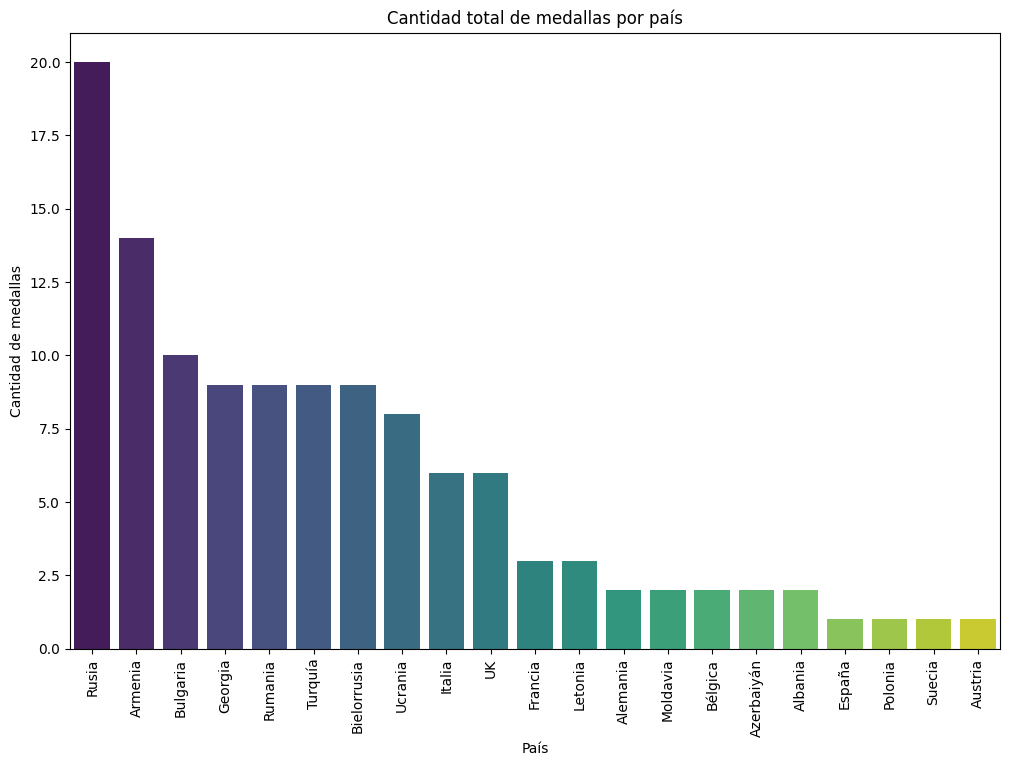

In [122]:
# Agrupar y sumar las medallas por país
medallas_por_pais = df_final.groupby('País')['Medalla'].count().reset_index(name='Cantidad de Medallas')

# Ordenar los países por cantidad de medallas
medallas_por_pais = medallas_por_pais.sort_values(by='Cantidad de Medallas', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=medallas_por_pais, x='País', y='Cantidad de Medallas', palette='viridis')

# Personalizar el gráfico
plt.title('Cantidad total de medallas por país')
plt.xlabel('País')
plt.ylabel('Cantidad de medallas')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.show()


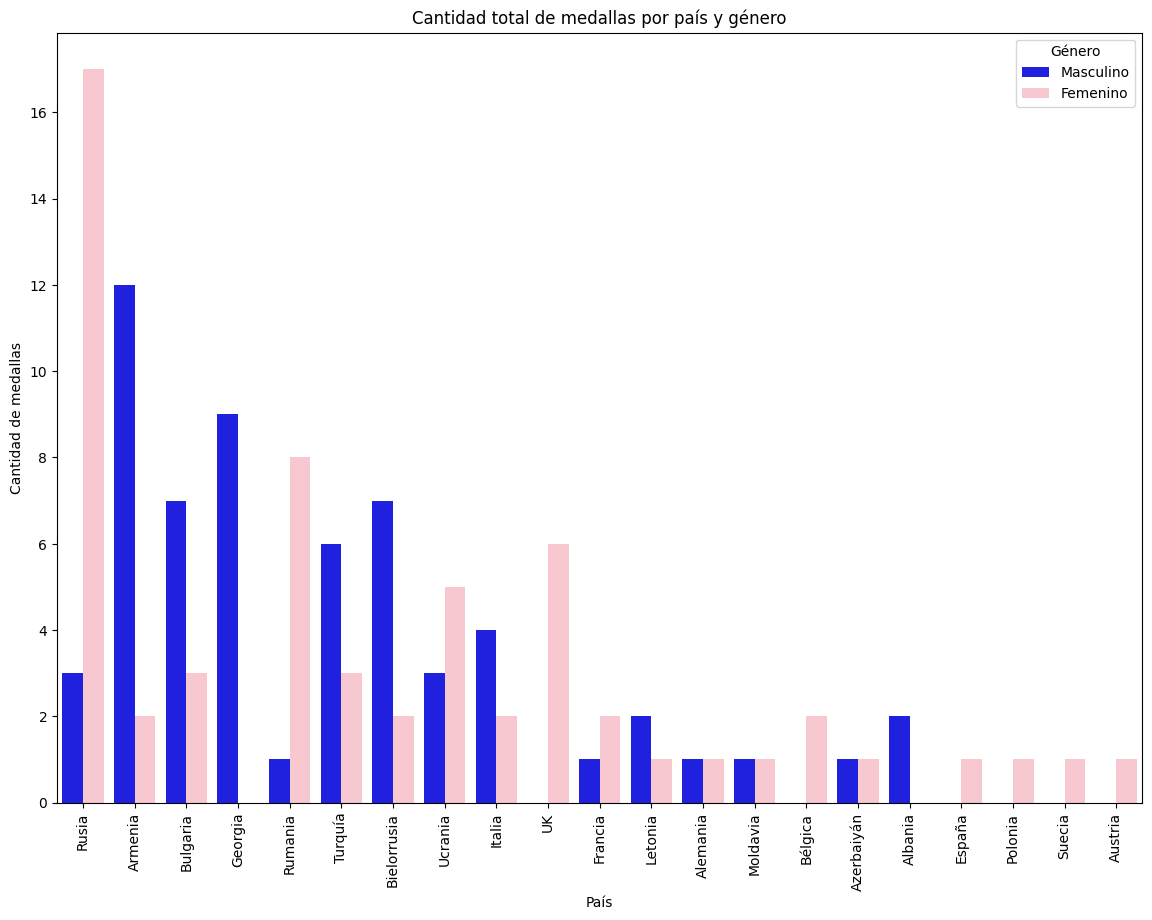

In [123]:
# Agrupar y contar las medallas por país y género
medallas_por_pais_genero = df_final.groupby(['País', 'Género'])['Medalla'].count().reset_index(name='Cantidad de Medallas')

# Ordenar los países por cantidad de medallas totales
medallas_totales_por_pais = df_final.groupby('País')['Medalla'].count().reset_index(name='Cantidad de Medallas Totales')
medallas_totales_por_pais = medallas_totales_por_pais.sort_values(by='Cantidad de Medallas Totales', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(14, 10))
sns.barplot(
    data=medallas_por_pais_genero,
    x='País',
    y='Cantidad de Medallas',
    hue='Género',
    palette={'Femenino': 'pink', 'Masculino': 'blue'},
    order=medallas_totales_por_pais['País']
)

# Personalizar el gráfico
plt.title('Cantidad total de medallas por país y género')
plt.xlabel('País')
plt.ylabel('Cantidad de medallas')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.legend(title='Género')
plt.show()


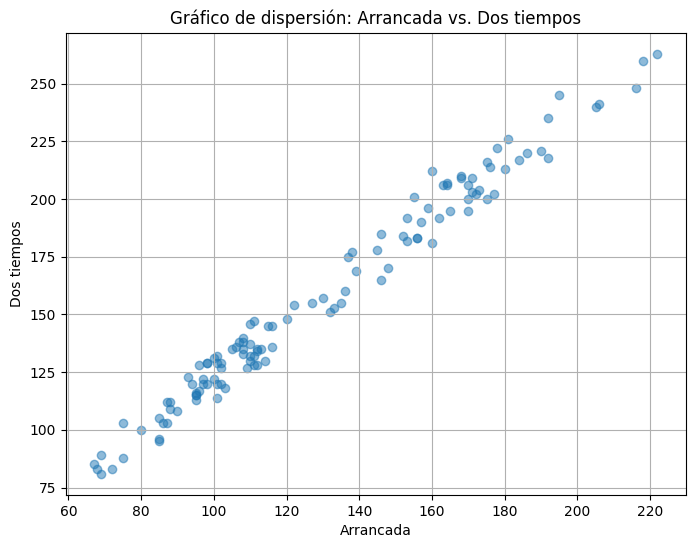

In [124]:
# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['Arrancada'], df['Dos tiempos'], alpha=0.5)
plt.title('Gráfico de dispersión: Arrancada vs. Dos tiempos')
plt.xlabel('Arrancada')
plt.ylabel('Dos tiempos')
plt.grid(True)
plt.show()

In [125]:
# Agrupar por género y categoría, y calcular la suma de la columna "Total" para cada grupo
total_por_genero_y_categoria = df.groupby(['Género', 'Categoría'])['Total'].sum()

# Dividir los resultados por género
total_masculino = total_por_genero_y_categoria['Masculino'].sort_values(ascending=False)
total_femenino = total_por_genero_y_categoria['Femenino'].sort_values(ascending=False)

# Imprimir los resultados
print("Total por categoría - Masculino:")
print(total_masculino)

print("\nTotal por categoría - Femenino:")
print(total_femenino)


Total por categoría - Masculino:
Categoría
109+    2759
109     2462
96      2294
102     2293
89      2215
81      2151
73      2035
67      1887
61      1724
55      1517
Name: Total, dtype: int64

Total por categoría - Femenino:
Categoría
87+    1630
76     1453
87     1444
64     1388
81     1354
71     1335
59     1279
55     1192
49     1098
45      929
Name: Total, dtype: int64


## **Preguntas obligatorias a resolver**

### ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)

In [126]:
# Contar medallas por país
medallas_por_pais = df_final.groupby(['País', 'Medalla']).size().unstack(fill_value=0)

# Ordenar las columnas por tipo de medalla
medallas_por_pais = medallas_por_pais[['Oro', 'Plata', 'Bronce']]

# Agregar una columna con el total de medallas
medallas_por_pais['Total'] = medallas_por_pais.sum(axis=1)

medallas_por_pais

Medalla,Oro,Plata,Bronce,Total
País,,,,
Albania,0,1,1,2
Alemania,1,1,0,2
Armenia,4,3,7,14
Austria,0,0,1,1
Azerbaiyán,1,0,1,2
Bielorrusia,3,3,3,9
Bulgaria,4,5,1,10
Bélgica,0,1,1,2
España,0,1,0,1


### ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

In [127]:
# Crear un DataFrame para hombres
df_hombres = df_final[df_final['Género'] == 'Masculino']

# Crear un DataFrame para mujeres
df_mujeres = df_final[df_final['Género'] == 'Femenino']

# Agrupar y contar medallas por país para hombres
df_hombres_medallas = df_hombres.groupby('País')['Medalla'].count()

# Agrupar y contar medallas por país para mujeres
df_mujeres_medallas = df_mujeres.groupby('País')['Medalla'].count()

# Combinar ambos DataFrames y llenar los valores faltantes con cero
df_medallas_por_pais = pd.concat([df_hombres_medallas, df_mujeres_medallas], axis=1, keys=['Hombres', 'Mujeres']).fillna(0)

# Calcular la diferencia en cantidad de medallas entre hombres y mujeres
df_medallas_por_pais['Diferencia'] = abs(df_medallas_por_pais['Hombres'] - df_medallas_por_pais['Mujeres'])

# Ordenar los países por la diferencia absoluta
paises_mayor_equidad = df_medallas_por_pais['Diferencia'].nsmallest(3)

print("Los tres países con mayor equidad en términos de éxito entre sus atletas femeninos y masculinos son:")
for pais, diferencia in paises_mayor_equidad.items():
    print(f"{pais} con una diferencia absoluta de {diferencia} medallas.")


Los tres países con mayor equidad en términos de éxito entre sus atletas femeninos y masculinos son:
Alemania con una diferencia absoluta de 0.0 medallas.
Azerbaiyán con una diferencia absoluta de 0.0 medallas.
Moldavia con una diferencia absoluta de 0.0 medallas.


### ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

In [128]:
# Calcular el promedio de puntos totales para atletas femeninos y masculinos en cada país
promedio_por_pais = df_final.groupby(['País', 'Género'])['Total'].mean().unstack()

# Calcular la diferencia absoluta entre los promedios
promedio_por_pais['Diferencia_absoluta'] = abs(promedio_por_pais['Femenino'] - promedio_por_pais['Masculino'])

# Encontrar el país donde la diferencia absoluta es mínima
pais_min_diferencia = promedio_por_pais['Diferencia_absoluta'].idxmin()
min_diferencia_absoluta = promedio_por_pais.loc[pais_min_diferencia]['Diferencia_absoluta']

print(f"El país donde los promedios de puntos totales conseguidos por atletas femeninos y masculinos son más cercanos es {pais_min_diferencia}, con una diferencia de {min_diferencia_absoluta} puntos.")


El país donde los promedios de puntos totales conseguidos por atletas femeninos y masculinos son más cercanos es Rumania, con una diferencia de 35.0 puntos.


# **Fase 2.** Web scraping

## Paso 1. Importar librerías

In [129]:
import requests
from bs4 import BeautifulSoup

## Paso 2. Cargar datos

In [130]:
# Lista de URLs
urls = [
    'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022',
    'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023',
    'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024'
]

# Recorrer cada URL y obtener el contenido
for url in urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    titulo = soup.title.text
    print(titulo)

Campeonato Europeo de Halterofilia de 2022 - Wikipedia, la enciclopedia libre
Campeonato Europeo de Halterofilia de 2023 - Wikipedia, la enciclopedia libre
Campeonato Europeo de Halterofilia de 2024 - Wikipedia, la enciclopedia libre


In [131]:
# Crear listas para almacenar los DataFrames
dataframes = []

# Iterar sobre cada URL
for url in urls:
    # Realizar la solicitud GET
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Encontrar las tablas
    tablas = soup.find_all('table', class_='wikitable')

    # Extraer la fecha de la página
    fecha = ''
    for td in soup.find_all('th', scope="row", style="text-align:left;font-size: 92%; width: 36%;;"):
        if "Fecha" in td.text:
            fecha = td.find_next('td').text.strip()
            break

    # Extraer la información del primer DataFrame (masculino)
    filas = tablas[0].find_all('tr')
    eventos = []
    oro = []
    plata = []
    bronce = []
    for fila in filas[1:]:
        cols = fila.find_all('td')
        cols = [elem.text.strip() for elem in cols]
        eventos.append(cols[0])
        oro.append(cols[1])
        plata.append(cols[2])
        bronce.append(cols[3])

    # Crear el DataFrame para los datos masculinos
    df_masculino = pd.DataFrame({
        'Evento': eventos,
        'Oro': oro,
        'Plata': plata,
        'Bronce': bronce
    })

    # Extraer la información del segundo DataFrame (femenino)
    filas = tablas[1].find_all('tr')
    eventos = []
    oro = []
    plata = []
    bronce = []
    for fila in filas[1:]:
        cols = fila.find_all('td')
        cols = [elem.text.strip() for elem in cols]
        eventos.append(cols[0])
        oro.append(cols[1])
        plata.append(cols[2])
        bronce.append(cols[3])

    # Crear el DataFrame para los datos femeninos
    df_femenino = pd.DataFrame({
        'Evento': eventos,
        'Oro': oro,
        'Plata': plata,
        'Bronce': bronce
    })

    # Agregar una columna 'Género' a cada DataFrame
    df_masculino['Género'] = 'Masculino'
    df_femenino['Género'] = 'Femenino'

    # Concatenar ambos DataFrames
    df_web = pd.concat([df_masculino, df_femenino], ignore_index=True)

    # Agregar la columna 'Fecha'
    df_web['Fecha'] = fecha

    # Agregar el DataFrame a la lista
    dataframes.append(df_web)

# Concatenar todos los DataFrames en uno solo
df_web = pd.concat(dataframes, ignore_index=True)

# Mostrar el DataFrame unificado
print('El dataframe contiene información de los años 2022-2024, extraídos de Wikipedia (el año 2021):')
df_web.head(10)

El dataframe contiene información de los años 2022-2024, extraídos de Wikipedia (el año 2021):


,Evento,Oro,Plata,Bronce,Género,Fecha
0,55 kg (29.05),Anguel Rusev Bulgaria Bulgaria 113 + 144 = 257...,Josué Brachi García España España 115 + 141 = ...,Dmytro Voronovsky Ucrania Ucrania 108 + 134 = ...,Masculino,25 de mayo – 5 de junio de 2022
1,61 kg (29.05),Ivan Dimov Bulgaria Bulgaria 135 + 151 = 286,Simon Brandhuber Alemania Alemania 134 + 152 =...,Gabriel Marinov Bulgaria Bulgaria 122 + 157 = 279,Masculino,25 de mayo – 5 de junio de 2022
2,67 kg (30.05),Valentin Guenchev Bulgaria Bulgaria 139 + 175 ...,Shota Mishvelidze Georgia Georgia 142 + 165 = 307,Acorán Hernández Mendoza España España 138 + 1...,Masculino,25 de mayo – 5 de junio de 2022
3,73 kg (31.05),Muhammed Özbek Turquía Turquía 149 + 190 = 339,Kaji Asanidze Georgia Georgia 150 + 176 = 326,Piotr Kudłaszyk Polonia Polonia 143 + 181 = 324,Masculino,25 de mayo – 5 de junio de 2022
4,81 kg (01.06),Rafik Harutiunian Armenia Armenia 160 + 194 = 354,Andrés Mata Pérez España España 160 + 186 = 346,Bozhidar Andreev Bulgaria Bulgaria 153 + 190 =...,Masculino,25 de mayo – 5 de junio de 2022
5,89 kg (02.06),Antonino Pizzolato Italia Italia 175 + 217 = 392,Karlos Nasar Bulgaria Bulgaria 171 + 211 = 382,Revaz Davitadze Georgia Georgia 171 + 198 = 369,Masculino,25 de mayo – 5 de junio de 2022
6,96 kg (03.06),Davit Hovhannisian Armenia Armenia 171 + 206 =...,Ara Aghanian Armenia Armenia 170 + 205 = 375,Romain Imadouchène Francia 160 + 210 = 370,Masculino,25 de mayo – 5 de junio de 2022
7,102 kg (04.06),David Fischerov Bulgaria Bulgaria 177 + 215 = 392,Samvel Gasparian Armenia Armenia 176 + 214 = 390,Marcos Ruiz Velasco España España 176 + 208 = 384,Masculino,25 de mayo – 5 de junio de 2022
8,109 kg (04.06),Jristo Jristov Bulgaria Bulgaria 180 + 211 = 391,Guiorgui Chjeidze Georgia Georgia 174 + 210 = 384,Arsen Martirosian Armenia Armenia 170 + 201 = 371,Masculino,25 de mayo – 5 de junio de 2022
9,+109 kg (05.06),Lasha Talajadze Georgia Georgia 217 + 245 = 462,Varazdat Lalayan Armenia Armenia 211 + 240 = 451,Gor Minasian Armenia Armenia 210 + 236 = 446,Masculino,25 de mayo – 5 de junio de 2022


## Paso 3. Exploración inicial

In [132]:
df_web.head(5)

,Evento,Oro,Plata,Bronce,Género,Fecha
0,55 kg (29.05),Anguel Rusev Bulgaria Bulgaria 113 + 144 = 257...,Josué Brachi García España España 115 + 141 = ...,Dmytro Voronovsky Ucrania Ucrania 108 + 134 = ...,Masculino,25 de mayo – 5 de junio de 2022
1,61 kg (29.05),Ivan Dimov Bulgaria Bulgaria 135 + 151 = 286,Simon Brandhuber Alemania Alemania 134 + 152 =...,Gabriel Marinov Bulgaria Bulgaria 122 + 157 = 279,Masculino,25 de mayo – 5 de junio de 2022
2,67 kg (30.05),Valentin Guenchev Bulgaria Bulgaria 139 + 175 ...,Shota Mishvelidze Georgia Georgia 142 + 165 = 307,Acorán Hernández Mendoza España España 138 + 1...,Masculino,25 de mayo – 5 de junio de 2022
3,73 kg (31.05),Muhammed Özbek Turquía Turquía 149 + 190 = 339,Kaji Asanidze Georgia Georgia 150 + 176 = 326,Piotr Kudłaszyk Polonia Polonia 143 + 181 = 324,Masculino,25 de mayo – 5 de junio de 2022
4,81 kg (01.06),Rafik Harutiunian Armenia Armenia 160 + 194 = 354,Andrés Mata Pérez España España 160 + 186 = 346,Bozhidar Andreev Bulgaria Bulgaria 153 + 190 =...,Masculino,25 de mayo – 5 de junio de 2022


In [133]:
df_web.tail(5)

,Evento,Oro,Plata,Bronce,Género,Fecha
55,71 kg (16.02),Loredana Toma Rumania Rumania 114 + 127 = 241,Siuzanna Valodzka AIN AIN[a 1]​ 105 + 130 = 235,Lisa Marie Schweizer Alemania Alemania 107 + 1...,Femenino,12 – 20 de febrero de 2024
56,76 kg (17.02),Genna Toko Kegne Italia Italia 101 + 120 = 221,Nikol Rubanovich Israel Israel 99 + 117 = 216,Lara Dancz Alemania Alemania 101 + 114 = 215,Femenino,12 – 20 de febrero de 2024
57,81 kg (18.02),Weronika Zielińska-Stubińska Polonia Polonia 1...,Elena Erighina Moldavia Moldavia 103+ 131 = 234,Dilara Narin Turquía Turquía 97 + 125 = 222,Femenino,12 – 20 de febrero de 2024
58,87 kg (19.02),Solfrid Koanda Noruega Noruega 120 + 160 = 280,Anastasiya Manievska Ucrania Ucrania 102 + 128...,Hripsime Jurshudian Armenia Armenia 105 + 122 ...,Femenino,12 – 20 de febrero de 2024
59,+87 kg (20.02),Emily Campbell Reino Unido Reino Unido 112 + 1...,Anastasiya Hotfrid Georgia Georgia 117 + 140 =...,Fatmagül Çevik Turquía Turquía 107 + 131 = 238,Femenino,12 – 20 de febrero de 2024


In [134]:
df_web['Evento'].dtypes

dtype('O')

In [135]:
df_web['Evento'].unique()

array(['55\xa0kg (29.05)', '61\xa0kg (29.05)', '67\xa0kg (30.05)',
       '73\xa0kg (31.05)', '81\xa0kg (01.06)', '89\xa0kg (02.06)',
       '96\xa0kg (03.06)', '102\xa0kg (04.06)', '109\xa0kg (04.06)',
       '+109\xa0kg (05.06)', '45\xa0kg (28.05)', '49\xa0kg (28.05)',
       '59\xa0kg (30.05)', '64\xa0kg (31.05)', '71\xa0kg (01.06)',
       '76\xa0kg (02.06)', '81\xa0kg (03.06)', '87\xa0kg (04.06)',
       '+87\xa0kg (05.06)', '55\xa0kg (16.04)', '61\xa0kg (16.04)',
       '67\xa0kg (17.04)', '73\xa0kg (18.04)', '81\xa0kg (19.04)',
       '89\xa0kg (20.04)', '96\xa0kg (21.04)', '102\xa0kg (22.04)',
       '109\xa0kg (22.04)', '+109\xa0kg (23.04)', '45\xa0kg (15.04)',
       '49\xa0kg (15.04)', '59\xa0kg (17.04)', '64\xa0kg (18.04)',
       '71\xa0kg (19.04)', '76\xa0kg (20.04)', '81\xa0kg (21.04)',
       '87\xa0kg (22.04)', '+87\xa0kg (23.04)', '55\xa0kg (13.02)',
       '61\xa0kg (13.02)', '67\xa0kg (14.02)', '73\xa0kg (15.02)',
       '81\xa0kg (16.02)', '89\xa0kg (17.02)', '96\x

In [136]:
df_web['Fecha'].dtypes

dtype('O')

In [137]:
# Extraer día y mes del evento
df_web['Día_Mes'] = df_web['Evento'].str.extract(r'\((.*?)\)')[0]

# Extraer día y mes de 'Día_Mes'
df_web[['Día', 'Mes']] = df_web['Día_Mes'].str.split('.', expand=True)

# Extraer año de la columna 'Fecha'
df_web['Año'] = df_web['Fecha'].str.extract(r'de\s(\d{4})$')

# Crear la nueva columna 'Fecha Completa'
df_web['Fecha'] = df_web['Año'].astype(str) + '-' + df_web['Mes'] + '-' + df_web['Día']

# Cambiar nombre de la columna 'Fecha Completa'
df_web.rename(columns={'Fecha Completa': 'Fecha'}, inplace=True)

# Eliminar columnas innecesarias
df_web.drop(columns=['Día_Mes', 'Día', 'Mes', 'Año'], inplace=True)

# Extraer el peso y conservar el símbolo '+'
df_web['Peso'] = df_web['Evento'].str.extract(r'([+-]?\d+)\s*kg')

# Eliminar de la columna 'Evento' todo lo que va después de 'kg'
df_web['Evento'] = df_web['Evento'].str.extract(r'([+-]?\d+)\s*kg')

# Eliminar la columna 'Peso'
df_web.drop(columns=['Peso'], inplace=True)

# Mostrar un sample del df_web
df_web.sample(2)

,Evento,Oro,Plata,Bronce,Género,Fecha
42,67,Gor Sahakian Armenia Armenia 140 + 171 = 311,Kaan Kahriman Turquía Turquía 142 + 168 = 310,Ferdi Hardal Turquía Turquía 135 + 169 = 304,Masculino,2024-02-14
49,+109,Varazdat Lalayan Armenia Armenia 205 + 250 = 455,Simon Martirosian Armenia Armenia 190 + 247 = 437,Eduard Ziaziulin AIN AIN[a 1]​ 195 + 241 = 436,Masculino,2024-02-20


In [138]:
df_web['Evento'].unique()

array(['55', '61', '67', '73', '81', '89', '96', '102', '109', '+109',
       '45', '49', '59', '64', '71', '76', '87', '+87'], dtype=object)

In [139]:
df_web.sample(2)

,Evento,Oro,Plata,Bronce,Género,Fecha
55,71,Loredana Toma Rumania Rumania 114 + 127 = 241,Siuzanna Valodzka AIN AIN[a 1]​ 105 + 130 = 235,Lisa Marie Schweizer Alemania Alemania 107 + 1...,Femenino,2024-02-16
0,55,Anguel Rusev Bulgaria Bulgaria 113 + 144 = 257...,Josué Brachi García España España 115 + 141 = ...,Dmytro Voronovsky Ucrania Ucrania 108 + 134 = ...,Masculino,2022-05-29


In [140]:
# Eliminar caracteres no deseados de las columnas 'Oro', 'Plata' y 'Bronce'
df_web['Oro'] = df_web['Oro'].str.replace(r'\+|=|\[n 1\]​|\[a 1\]​', '', regex=True)
df_web['Plata'] = df_web['Plata'].str.replace(r'\+|=|\[n 1\]​|\[a 1\]​', '', regex=True)
df_web['Bronce'] = df_web['Bronce'].str.replace(r'\+|=|\[n 1\]​|\[a 1\]​', '', regex=True)

# Reemplazar 'Reino Unido' por 'UK' y 'AIN' por 'Bielorrusia' en las columnas 'Oro', 'Plata' y 'Bronce'
df_web['Oro'] = df_web['Oro'].str.replace('Reino Unido', 'UK').str.replace('AIN', 'Bielorrusia')
df_web['Plata'] = df_web['Plata'].str.replace('Reino Unido', 'UK').str.replace('AIN', 'Bielorrusia')
df_web['Bronce'] = df_web['Bronce'].str.replace('Reino Unido', 'UK').str.replace('AIN', 'Bielorrusia')

# Mostrar el resultado
df_web.sample(10)

,Evento,Oro,Plata,Bronce,Género,Fecha
46,96,Hakob Mkrtchian Armenia Armenia 166 209 375,Davit Hovhannisian Armenia Armenia 169 205 374,Pavel Jadasevich Bielorrusia Bielorrusia 165 ...,Masculino,2024-02-18
38,87,Solfrid Koanda Noruega Noruega 117 155 272,Anastasiya Manievska Ucrania Ucrania 108 130 ...,Hripsime Jurshudian Armenia Armenia 107 120 227,Femenino,2023-04-22
10,45,Şaziye Erdoğan Turquía Turquía 73 90 163,Cansu Bektaş Turquía Turquía 68 85 153,Radmila Zagorac Serbia Serbia 68 84 152,Femenino,2022-05-28
8,109,Jristo Jristov Bulgaria Bulgaria 180 211 391,Guiorgui Chjeidze Georgia Georgia 174 210 384,Arsen Martirosian Armenia Armenia 170 201 371,Masculino,2022-06-04
17,81,Iryna Deja Ucrania Ucrania 116 137 253,Alina Marushchak Ucrania Ucrania 108 127 235,Dilara Narin Turquía Turquía 99 133 232,Femenino,2022-06-03
53,59,Kamila Konotop Ucrania Ucrania 105 125 230,Dora Tchakounté Francia 98 117 215,Saara Retulainen Finlandia Finlandia 95 119 214,Femenino,2024-02-14
33,59,Kamila Konotop Ucrania Ucrania 106 129 235,Nina Sterckx Bélgica Bélgica 93 116 209,Nadiya Shpylka Ucrania Ucrania 93 114 207,Femenino,2023-04-17
25,89,Karlos Nasar Bulgaria Bulgaria 174 221 395,Andranik Karapetian Armenia Armenia 178 196 374,Marin Robu Moldavia Moldavia 166 198 364,Masculino,2023-04-20
54,64,Hanna Davydova Ucrania Ucrania 100 120 220,Svitlana Samuliak Ucrania Ucrania 101 118 219,Wiktoria Wołk Polonia Polonia 94 121 215,Femenino,2024-02-15
51,49,Mihaela Cambei Rumania Rumania 90 109 199,Oliwia Drzazga Polonia Polonia 74 96 170,Tham Nguyen Irlanda 74 95 169,Femenino,2024-02-12


In [141]:
df_web['Evento'].unique()

array(['55', '61', '67', '73', '81', '89', '96', '102', '109', '+109',
       '45', '49', '59', '64', '71', '76', '87', '+87'], dtype=object)

In [142]:
# Mover '+' detrás del número si está al principio en la columna 'Eventos'
df_web['Evento'] = df_web['Evento'].str.replace(r'^\+(\d+)', r'\1+', regex=True)

In [143]:
df_web.sample(10)

,Evento,Oro,Plata,Bronce,Género,Fecha
28,109,Samvel Gasparian Armenia Armenia 175 220 395,Guiorgui Chjeidze Georgia Georgia 173 208 381,Petros Petrosian Armenia Armenia 165 214 379,Masculino,2023-04-22
18,87,Solfrid Koanda Noruega Noruega 109 143 252,Anastasiya Manievska Ucrania Ucrania 107 130 ...,Anastasiya Hotfrid Georgia Georgia 106 129 235,Femenino,2022-06-04
17,81,Iryna Deja Ucrania Ucrania 116 137 253,Alina Marushchak Ucrania Ucrania 108 127 235,Dilara Narin Turquía Turquía 99 133 232,Femenino,2022-06-03
35,71,Loredana Toma Rumania Rumania 110 130 240,Giulia Miserendino Italia Italia 105 125 230,Sarah Davies UK UK 100 126 226,Femenino,2023-04-19
48,109,Dadaş Dadaşbəyli Azerbaiyán Azerbaiyán 176 21...,Jristo Jristov Bulgaria Bulgaria 175 205 380,Matthäus Hofmann Alemania Alemania 172 206 378,Masculino,2024-02-19
29,109+,Lasha Talajadze Georgia Georgia 222 252 474,Varazdat Lalayan Armenia Armenia 212 250 462,Simon Martirosian Armenia Armenia 195 245 440,Masculino,2023-04-23
44,81,Oscar Reyes Martínez Italia Italia 155 191 346,Kristi Ramadani Albania Albania 151 190 341,Rafik Harutiunian Armenia Armenia 154 182 336,Masculino,2024-02-16
2,67,Valentin Guenchev Bulgaria Bulgaria 139 175 314,Shota Mishvelidze Georgia Georgia 142 165 307,Acorán Hernández Mendoza España España 138 16...,Masculino,2022-05-30
25,89,Karlos Nasar Bulgaria Bulgaria 174 221 395,Andranik Karapetian Armenia Armenia 178 196 374,Marin Robu Moldavia Moldavia 166 198 364,Masculino,2023-04-20
37,81,Iryna Deja Ucrania Ucrania 123 135 258,Dilara Narin Turquía Turquía 101 134 235,Elena Erighina Moldavia Moldavia 104 130 234,Femenino,2023-04-21


In [144]:
# Dividir una celda de la columna 'Oro' en str
print(df_web['Oro'].iloc[0].split())

['Anguel', 'Rusev', 'Bulgaria', 'Bulgaria', '113', '144', '257']


In [145]:
# Función para eliminar el segundo elemento duplicado de una lista y unirla nuevamente en una cadena
def eliminar_segundo_duplicado(lista):
    seen = set()
    new_list = []
    for elemento in lista:
        if elemento not in seen:
            seen.add(elemento)
            new_list.append(elemento)
    return ' '.join(new_list)

# Eliminar el segundo elemento duplicado de las celdas en las columnas 'Oro', 'Plata' y 'Bronce'
df_web['Oro'] = df_web['Oro'].apply(lambda x: eliminar_segundo_duplicado(x.split()))
df_web['Plata'] = df_web['Plata'].apply(lambda x: eliminar_segundo_duplicado(x.split()))
if 'Bronce' in df_web.columns:
    df_web['Bronce'] = df_web['Bronce'].apply(lambda x: eliminar_segundo_duplicado(x.split()))

# Mostrar un sample del df_web
df_web.sample(2)

,Evento,Oro,Plata,Bronce,Género,Fecha
29,109+,Lasha Talajadze Georgia 222 252 474,Varazdat Lalayan Armenia 212 250 462,Simon Martirosian Armenia 195 245 440,Masculino,2023-04-23
20,55,Anguel Rusev Bulgaria 109 141 250,Ramin Shamilishvili Georgia 113 136 249,Valentin Iancu Rumania 109 136 245,Masculino,2023-04-16


In [146]:
# Chequear nulos
print(df_web.isnull().sum())

Evento    0
Oro       0
Plata     0
Bronce    0
Género    0
Fecha     0
dtype: int64


In [147]:
# Chequear duplicados
print(df_web.duplicated().sum())

0


## Paso 4. Crear un único dataframe con los datos de 2019 y 2020

---------

Primero transformaré los datos y después haré un único dataframe con los datos de 2019-2024. Se tiene en cuenta que los datos de 2020, son los de 2021 en tanto que durante el 2020 no se realizó campeonato de halterofilia, por la epidemia del Covid. 

--------

## Paso 5. Transformar los datos

Transforma el DataFrame para tener las siguientes columnas: Eventos, Año, Genero, Medalla (que indica si es Oro, Plata o Bronce) y Atleta (que contiene la información del atleta correspondiente)

Formato inicial:

| Eventos | Oro | Plata | Bronce | Año | Género |
|---------|-----|-------|--------|-----|--------|

**¡Importante!**
El dataframe final debe tener este formato:

| Eventos | Año | Genero | Medalla | Atleta |
|---------|-----|-------|--------|-----|

In [148]:
# Renombramos las columnas según lo que has indicado
df_web.rename(columns={'Evento': 'Eventos', 'Fecha': 'Año'}, inplace=True)

# Utilizar la función melt para convertir las columnas 'Oro', 'Plata' y 'Bronce' en una única columna 'Medalla'
df_web = df_web.melt(id_vars=['Eventos', 'Año', 'Género'], 
                        value_vars=['Oro', 'Plata', 'Bronce'], 
                        var_name='Medalla', 
                        value_name='Atleta')

# Convertir la columna 'Medalla' a tipo category
df_web['Medalla'] = df_web['Medalla'].astype('category')

# Convertir la columna Medalla a tipo categórico con el orden deseado
df_web['Medalla'] = pd.Categorical(df_web['Medalla'], categories=['Oro', 'Plata', 'Bronce'], ordered=True)

# Reordenar las columnas
df_web = df_web[['Eventos', 'Año', 'Género', 'Medalla', 'Atleta']]

# Mostramos el DataFrame resultante
df_web.sample(5)


,Eventos,Año,Género,Medalla,Atleta
110,45,2024-02-12,Femenino,Plata,Gamze Altun Turquía 65 92 157
146,96,2023-04-21,Masculino,Bronce,Cristiano Ficco Italia 165 198 363
149,109+,2023-04-23,Masculino,Bronce,Simon Martirosian Armenia 195 245 440
142,67,2023-04-17,Masculino,Bronce,Kaan Kahriman Turquía 141 160 301
63,73,2022-05-31,Masculino,Plata,Kaji Asanidze Georgia 150 176 326


## Paso 6. Creación de columnas


- Fecha
- Nombre
- Apellido
- País
- Resultados
- Arrancada
- Dos tiempos
- Total

## Paso 7. Filtrado de columnas y ordenación

**¡Importante!**
El dataframe final debe contener exclusivamente las siguientes columnas:

| Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
|-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

In [149]:
# Chequear el número de elementos y dividir la columna "Atleta" en las columnas solicitadas
df_web[['Nombre', 'Apellido', 'País', 'Arrancada', 'Dos tiempos', 'Total']] = df_web['Atleta'].str.split(' ', n=5, expand=True)

# Si tiene 7 elementos, dividir en 7 columnas
mask = df_web['Atleta'].str.split().str.len().eq(7)
df_web.loc[mask, ['Nombre', 'Apellido', 'País', 'Arrancada', 'Dos tiempos', 'Total', 'Fecha_tmp']] = df_web['Atleta'].str.split(' ', expand=True)

# Renombrar la columna "Año" como "Fecha" y eliminar la columna temporal
df_web.rename(columns={'Fecha_tmp': 'Fecha'}, inplace=True)

# Renombrar la columna "Eventos" como "Categoría" 
df_web.rename(columns={'Eventos': 'Categoría'}, inplace=True)

# Eliminar la columna "Fecha"
df_web.drop(columns=['Fecha'], inplace=True)

# Reordenar las columnas
df_web = df_web[['Género', 'Categoría', 'Año', 'Medalla', 'Atleta', 'Nombre', 'Apellido', 'País', 'Arrancada', 'Dos tiempos', 'Total']]

# Mostrar el resultado
df_web.sample(5)

,Género,Categoría,Año,Medalla,Atleta,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
34,Femenino,64,2023-04-18,Oro,Nuray Güngör Turquía 99 120 219,Nuray,Güngör,Turquía,99,120,219
13,Femenino,59,2022-05-30,Oro,Dora Tchakounté Francia 96 117 213,Dora,Tchakounté,Francia,96,117,213
115,Femenino,71,2024-02-16,Plata,Siuzanna Valodzka Bielorrusia 105 130 235,Siuzanna,Valodzka,Bielorrusia,105,130,235
59,Femenino,87+,2024-02-20,Oro,Emily Campbell UK 112 151 263,Emily,Campbell,UK,112,151,263
163,Masculino,73,2024-02-15,Bronce,Ritvars Suharevs Letonia 154 177 331,Ritvars,Suharevs,Letonia,154,177,331


In [150]:
# Renombrar la columna "Año" como "Fecha" 
df_web.rename(columns={'Año': 'Fecha'}, inplace=True)

In [151]:
filas_nulas = df_web[df_web.isnull().any(axis=1)]
filas_nulas

,Género,Categoría,Fecha,Medalla,Atleta,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
24,Masculino,81,2023-04-19,Oro,Oscar Reyes Martínez Italia 155 188 343,NaN,NaN,NaN,NaN,NaN,NaN
44,Masculino,81,2024-02-16,Oro,Oscar Reyes Martínez Italia 155 191 346,NaN,NaN,NaN,NaN,NaN,NaN
56,Femenino,76,2024-02-17,Oro,Genna Toko Kegne Italia 101 120 221,NaN,NaN,NaN,NaN,NaN,NaN
60,Masculino,55,2022-05-29,Plata,Josué Brachi García España 115 141 256,NaN,NaN,NaN,NaN,NaN,NaN
64,Masculino,81,2022-06-01,Plata,Andrés Mata Pérez España 160 186 346,NaN,NaN,NaN,NaN,NaN,NaN
75,Femenino,71,2022-06-01,Plata,Lisa Marie Schweizer Alemania 103 120 223,NaN,NaN,NaN,NaN,NaN,NaN
82,Masculino,67,2023-04-17,Plata,Acorán Hernández Mendoza España 140 165 305,NaN,NaN,NaN,NaN,NaN,NaN
83,Masculino,73,2023-04-18,Plata,David Sánchez López España 150 185 335,NaN,NaN,NaN,NaN,NaN,NaN
84,Masculino,81,2023-04-19,Plata,Batu Han Yüksel Turquía 152 187 339,NaN,NaN,NaN,NaN,NaN,NaN
122,Masculino,67,2022-05-30,Bronce,Acorán Hernández Mendoza España 138 161 299,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
# Si tiene 7 elementos, asignar el primer elemento a la columna "Nombre", el cuarto a "País", el quinto a "Arrancada" y el sexto a "Dos tiempos"
mask = df_web['Atleta'].str.split().str.len().eq(7)
df_web.loc[mask, ['Nombre']] = df_web['Atleta'].str.split().str[0]
df_web.loc[mask, ['País']] = df_web['Atleta'].str.split().str[3]
df_web.loc[mask, ['Arrancada']] = df_web['Atleta'].str.split().str[4]
df_web.loc[mask, ['Dos tiempos']] = df_web['Atleta'].str.split().str[5]
df_web.loc[mask, ['Total']] = df_web['Atleta'].str.split().str[6]

# Si tiene 7 elementos, unir el segundo y tercer elemento y asignarlo a la columna "Apellido"
mask = df_web['Atleta'].str.split().str.len().eq(7)
df_web.loc[mask, ['Apellido']] = df_web['Atleta'].str.split().str[1] + ' ' + df_web['Atleta'].str.split().str[2]

# Mostrar el resultado
df_web.sample(1)

,Género,Categoría,Fecha,Medalla,Atleta,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
86,Masculino,96,2023-04-21,Plata,Ara Aghanian Armenia 165 199 364,Ara,Aghanian,Armenia,165,199,364


In [153]:
filas_nulas = df_web[df_web.isnull().any(axis=1)]
filas_nulas

,Género,Categoría,Fecha,Medalla,Atleta,Nombre,Apellido,País,Arrancada,Dos tiempos,Total


In [154]:
# Eliminar la columna "Atleta"
df_web.drop(columns=['Atleta'], inplace=True)

## Paso 8. Tipo de datos

**¡Importante!**
Los tipos de las columnas deben ser los siguientes:

- **Género**: `object`
- **Categoría**: `object`
- **Fecha**: `datetime64[ns]`
- **Medalla**: `category`
- **Nombre**: `object`
- **Apellido**: `object`
- **País**: `object`
- **Arrancada**: `int64`
- **Dos tiempos**: `int64`
- **Total**: `int64`

In [155]:
# Eliminar caracteres no imprimibles de las columnas 'Arrancada', 'Dos tiempos' y 'Total'
df_web['Arrancada'] = df_web['Arrancada'].apply(lambda x: re.sub(r'\W+', '', x))
df_web['Dos tiempos'] = df_web['Dos tiempos'].apply(lambda x: re.sub(r'\W+', '', x))
df_web['Total'] = df_web['Total'].apply(lambda x: re.sub(r'\W+', '', x))

# Convertir la columna "Fecha" a datetime
df_web['Fecha'] = pd.to_datetime(df_web['Fecha'])

# Convertir las columnas numéricas al tipo correcto
df_web[['Arrancada', 'Dos tiempos', 'Total']] = df_web[['Arrancada', 'Dos tiempos', 'Total']].astype(int)

# Mostrar los tipos de datos del DataFrame final
df_web.dtypes

Género                 object
Categoría              object
Fecha          datetime64[ns]
Medalla              category
Nombre                 object
Apellido               object
País                   object
Arrancada               int64
Dos tiempos             int64
Total                   int64
dtype: object

In [156]:
# Resetear index
df_web.reset_index(drop = True)
df_web = df_web.reset_index(drop = True)
df_web.head(10)

,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
0,Masculino,55,2022-05-29,Oro,Anguel,Rusev,Bulgaria,113,144,257
1,Masculino,61,2022-05-29,Oro,Ivan,Dimov,Bulgaria,135,151,286
2,Masculino,67,2022-05-30,Oro,Valentin,Guenchev,Bulgaria,139,175,314
3,Masculino,73,2022-05-31,Oro,Muhammed,Özbek,Turquía,149,190,339
4,Masculino,81,2022-06-01,Oro,Rafik,Harutiunian,Armenia,160,194,354
5,Masculino,89,2022-06-02,Oro,Antonino,Pizzolato,Italia,175,217,392
6,Masculino,96,2022-06-03,Oro,Davit,Hovhannisian,Armenia,171,206,377
7,Masculino,102,2022-06-04,Oro,David,Fischerov,Bulgaria,177,215,392
8,Masculino,109,2022-06-04,Oro,Jristo,Jristov,Bulgaria,180,211,391
9,Masculino,109+,2022-06-05,Oro,Lasha,Talajadze,Georgia,217,245,462


In [157]:
df_final['Categoría'].unique()

array(['45', '49', '55', '59', '64', '71', '76', '81', '87', '87+', '102',
       '109', '109+', '61', '67', '73', '89', '96'], dtype=object)

In [158]:
df_web['Categoría'].unique()

array(['55', '61', '67', '73', '81', '89', '96', '102', '109', '109+',
       '45', '49', '59', '64', '71', '76', '87', '87+'], dtype=object)

## Paso 9. Ordendar
**¡Importante!**
El conjunto de datos debe estar ordenado por las siguientes columnas:
['Genero', 'Categoria', 'Medalla']

| Genero   | Categoria | Fecha      | Medalla | Nombre    | Apellido | País      | Arrancada | Dos tiempos | Total |
|----------|-----------|------------|---------|-----------|----------|-----------|-----------|-------------|-------|
| Femenino | 45        | 2020-04-03 | Oro     | Nadezhda  | Nguen    | Bulgaria  | 72        | 83          | 155   |
| Femenino | 45        | 2020-04-03 | Plata   | Ivana     | Petrova  | Bulgaria  | 67        | 85          | 152   |
| Femenino | 45        | 2020-04-03 | Bronce  | Melisa    | Güneş    | Turquía   | 68        | 83          | 151   |
| Femenino | 49        | 2020-04-03 | Oro     | Monica    | Csengeri | Rumania   | 86        | 103         | 189   |
| Femenino | 49        | 2020-04-03 | Plata   | Kristina  | Sobol    | Rusia     | 85        | 96          | 181   |


In [159]:
# Ordenar el DataFrame por las columnas 'Genero', 'Categoria' y 'Medalla'
df_web.sort_values(by=['Género', 'Categoría', 'Medalla'], inplace=True)

# Mostrar las primeras filas del DataFrame ordenado
df_web.head(20)

,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
10,Femenino,45,2022-05-28,Oro,Şaziye,Erdoğan,Turquía,73,90,163
30,Femenino,45,2023-04-15,Oro,Cansu,Bektaş,Turquía,72,90,162
50,Femenino,45,2024-02-12,Oro,Cansu,Bektaş,Turquía,75,88,163
70,Femenino,45,2022-05-28,Plata,Cansu,Bektaş,Turquía,68,85,153
90,Femenino,45,2023-04-15,Plata,Adriana,Pană,Rumania,70,83,153
110,Femenino,45,2024-02-12,Plata,Gamze,Altun,Turquía,65,92,157
130,Femenino,45,2022-05-28,Bronce,Radmila,Zagorac,Serbia,68,84,152
150,Femenino,45,2023-04-15,Bronce,Marta,García Rincón,España,68,85,153
170,Femenino,45,2024-02-12,Bronce,Marta,García Rincón,España,72,84,156
11,Femenino,49,2022-05-28,Oro,Giulia,Imperio,Italia,79,92,171


## Paso 10. EDA
Realiza un análisis exploratorio de los datos que te permita ganar conocimiento sobre el conjunto de datos antes de resolver a las preguntas

In [160]:
df = df_web

def check_df(df):
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        print('\n########################################################################################')
        print("¿Cuáles son las primeras cinco filas del conjunto de datos?")
        display(df.head())
        print('\n########################################################################################')
        print("¿Cuáles son las últimas cinco filas del conjunto de datos?")
        display(df.tail())
        print('\n########################################################################################')
        print("¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?")
        display(df.sample(n = 5))
        print('\n########################################################################################')
        print("¿Cuáles son las columnas del conjunto de datos?")
        for i in list(df.columns):
            print('\t - ' + i)
        print('\n########################################################################################')
        print("¿Cuál es el tipo de datos de cada columna?")
        print(df.dtypes)
        print('\n########################################################################################')
        print("¿Cuántas columnas hay de cada tipo de datos?")
        print(df.dtypes.value_counts())
        print('\n########################################################################################')
        print("¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?")
        print(df.info())
        print('\n########################################################################################')
        print("¿Cuántos valores únicos tiene cada columna?")
        print(df.nunique())
        print('\n########################################################################################')
        print("¿Cuáles son las estadísticas descriptivas básicas de todas las columnas?")
        display(df.describe(include = 'all').fillna(''))
        print('\n########################################################################################')
        print("¿Hay valores nulos en el conjunto de datos?")
        print(df.isnull().sum())
        print('\n########################################################################################')
        print("¿Cuál es la proporción de valores nulos en cada columna?")
        print(round((df.isnull().sum()/len(df)*100), 2))
        print('\n########################################################################################')

check_df(df)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 180 filas y 10 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
10,Femenino,45,2022-05-28,Oro,Şaziye,Erdoğan,Turquía,73,90,163
30,Femenino,45,2023-04-15,Oro,Cansu,Bektaş,Turquía,72,90,162
50,Femenino,45,2024-02-12,Oro,Cansu,Bektaş,Turquía,75,88,163
70,Femenino,45,2022-05-28,Plata,Cansu,Bektaş,Turquía,68,85,153
90,Femenino,45,2023-04-15,Plata,Adriana,Pană,Rumania,70,83,153



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
86,Masculino,96,2023-04-21,Plata,Ara,Aghanian,Armenia,165,199,364
106,Masculino,96,2024-02-18,Plata,Davit,Hovhannisian,Armenia,169,205,374
126,Masculino,96,2022-06-03,Bronce,Romain,Imadouchène,Francia,160,210,370
146,Masculino,96,2023-04-21,Bronce,Cristiano,Ficco,Italia,165,198,363
166,Masculino,96,2024-02-18,Bronce,Pavel,Jadasevich,Bielorrusia,165,195,360



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
139,Femenino,87+,2022-06-05,Bronce,Sarah,Fischer,Austria,102,128,230
56,Femenino,76,2024-02-17,Oro,Genna,Toko Kegne,Italia,101,120,221
95,Femenino,71,2023-04-19,Plata,Giulia,Miserendino,Italia,105,125,230
0,Masculino,55,2022-05-29,Oro,Anguel,Rusev,Bulgaria,113,144,257
60,Masculino,55,2022-05-29,Plata,Josué,Brachi García,España,115,141,256



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Género
	 - Categoría
	 - Fecha
	 - Medalla
	 - Nombre
	 - Apellido
	 - País
	 - Arrancada
	 - Dos tiempos
	 - Total

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Género                 object
Categoría              object
Fecha          datetime64[ns]
Medalla              category
Nombre                 object
Apellido               object
País                   object
Arrancada               int64
Dos tiempos             int64
Total                   int64
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object            5
int64             3
datetime64[ns]    1
category          1
Name: count, dtype: int64

#####################################################

,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
count,180,180,180,180,180,180,180,180.0,180.0,180.0
unique,2,18,,3,109,114,25,,,
top,Femenino,55,,Oro,Anastasiya,Manievska,Armenia,,,
freq,90,18,,60,6,3,30,,,
mean,,,2023-04-12 16:00:00,,,,,127.355556,154.311111,282.233333
min,,,2022-05-28 00:00:00,,,,,65.0,11.0,152.0
25%,,,2022-06-03 18:00:00,,,,,99.0,120.0,220.0
50%,,,2023-04-19 00:00:00,,,,,113.5,140.5,253.0
75%,,,2024-02-13 06:00:00,,,,,160.0,194.25,355.5
max,,,2024-02-20 00:00:00,,,,,222.0,252.0,474.0



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Género         0
Categoría      0
Fecha          0
Medalla        0
Nombre         0
Apellido       0
País           0
Arrancada      0
Dos tiempos    0
Total          0
dtype: int64

########################################################################################
¿Cuál es la proporción de valores nulos en cada columna?
Género         0.0
Categoría      0.0
Fecha          0.0
Medalla        0.0
Nombre         0.0
Apellido       0.0
País           0.0
Arrancada      0.0
Dos tiempos    0.0
Total          0.0
dtype: float64

########################################################################################


In [161]:
paises_unicos = df_web['País'].unique()
print(paises_unicos)

['Turquía' 'Rumania' 'Serbia' 'España' 'Italia' 'Ucrania' 'Polonia'
 'Irlanda' 'Albania' 'Armenia' 'Bélgica' 'Noruega' 'Francia' 'Finlandia'
 'UK' 'Suecia' 'Alemania' 'Bielorrusia' 'Letonia' 'Israel' 'Moldavia'
 'Georgia' 'Austria' 'Bulgaria' 'Azerbaiyán']


-----

## Dataframe completo con los datos de 2019 a 2024.

In [162]:
df_final.columns

Index(['Género', 'Categoría', 'Fecha', 'Medalla', 'Nombre', 'Apellido', 'País',
       'Arrancada', 'Dos tiempos', 'Total'],
      dtype='object')

In [163]:
df_web.columns

Index(['Género', 'Categoría', 'Fecha', 'Medalla', 'Nombre', 'Apellido', 'País',
       'Arrancada', 'Dos tiempos', 'Total'],
      dtype='object')

In [164]:
df_final.dtypes

Género                 object
Categoría              object
Fecha          datetime64[ns]
Medalla              category
Nombre                 object
Apellido               object
País                   object
Arrancada               int64
Dos tiempos             int64
Total                   int64
dtype: object

In [165]:
df_web.dtypes

Género                 object
Categoría              object
Fecha          datetime64[ns]
Medalla              category
Nombre                 object
Apellido               object
País                   object
Arrancada               int64
Dos tiempos             int64
Total                   int64
dtype: object

In [166]:
df_final['Medalla'].dtype

CategoricalDtype(categories=['Oro', 'Plata', 'Bronce'], ordered=True, categories_dtype=object)

In [167]:
df_web['Medalla'].dtype

CategoricalDtype(categories=['Oro', 'Plata', 'Bronce'], ordered=True, categories_dtype=object)

In [168]:
df_final.shape

(120, 10)

In [169]:
df_web.shape

(180, 10)

In [170]:
df_final.reset_index(drop = True)
df_final = df_final.reset_index(drop = True)

In [171]:
df_web.reset_index(drop = True)
df_web = df_web.reset_index(drop = True)

In [172]:
# Concatenar los dos DataFrames verticalmente
df_completo = pd.concat([df_final, df_web], axis=0)
# Ordenar el DataFrame resultante por la columna 'Fecha'
df_completo = df_completo.sort_values(by=['Género', 'Categoría', 'Medalla'])
# Mostrar el DataFrame resultante
df_completo.head(5)

,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
0,Femenino,45,2019-04-06,Oro,Şaziye,Erdoğan,Turquía,75,88,163
1,Femenino,45,2021-04-03,Oro,Nadezhda,Nguen,Bulgaria,72,83,155
0,Femenino,45,2022-05-28,Oro,Şaziye,Erdoğan,Turquía,73,90,163
1,Femenino,45,2023-04-15,Oro,Cansu,Bektaş,Turquía,72,90,162
2,Femenino,45,2024-02-12,Oro,Cansu,Bektaş,Turquía,75,88,163


In [173]:
# Definir el orden deseado de las medallas
orden_medallas = ['Oro', 'Plata', 'Bronce']

# Convertir la columna 'Medalla' a tipo categórico con el orden especificado
df_completo['Medalla'] = pd.Categorical(df_completo['Medalla'], categories=orden_medallas, ordered=False)

# Ordenar el DataFrame resultante por las columnas especificadas
df_completo = df_completo.sort_values(by=['Género', 'Categoría', 'Medalla'], ascending=[True, True, True])

# Mostrar el DataFrame resultante
df_completo.head(15)

,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
0,Femenino,45,2019-04-06,Oro,Şaziye,Erdoğan,Turquía,75,88,163
1,Femenino,45,2021-04-03,Oro,Nadezhda,Nguen,Bulgaria,72,83,155
0,Femenino,45,2022-05-28,Oro,Şaziye,Erdoğan,Turquía,73,90,163
1,Femenino,45,2023-04-15,Oro,Cansu,Bektaş,Turquía,72,90,162
2,Femenino,45,2024-02-12,Oro,Cansu,Bektaş,Turquía,75,88,163
2,Femenino,45,2019-04-06,Plata,Ivana,Petrova,Bulgaria,69,89,158
3,Femenino,45,2021-04-03,Plata,Ivana,Petrova,Bulgaria,67,85,152
3,Femenino,45,2022-05-28,Plata,Cansu,Bektaş,Turquía,68,85,153
4,Femenino,45,2023-04-15,Plata,Adriana,Pană,Rumania,70,83,153
5,Femenino,45,2024-02-12,Plata,Gamze,Altun,Turquía,65,92,157


In [174]:
df_completo.dtypes

Género                 object
Categoría              object
Fecha          datetime64[ns]
Medalla              category
Nombre                 object
Apellido               object
País                   object
Arrancada               int64
Dos tiempos             int64
Total                   int64
dtype: object

In [175]:
df_completo.head(10)

,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
0,Femenino,45,2019-04-06,Oro,Şaziye,Erdoğan,Turquía,75,88,163
1,Femenino,45,2021-04-03,Oro,Nadezhda,Nguen,Bulgaria,72,83,155
0,Femenino,45,2022-05-28,Oro,Şaziye,Erdoğan,Turquía,73,90,163
1,Femenino,45,2023-04-15,Oro,Cansu,Bektaş,Turquía,72,90,162
2,Femenino,45,2024-02-12,Oro,Cansu,Bektaş,Turquía,75,88,163
2,Femenino,45,2019-04-06,Plata,Ivana,Petrova,Bulgaria,69,89,158
3,Femenino,45,2021-04-03,Plata,Ivana,Petrova,Bulgaria,67,85,152
3,Femenino,45,2022-05-28,Plata,Cansu,Bektaş,Turquía,68,85,153
4,Femenino,45,2023-04-15,Plata,Adriana,Pană,Rumania,70,83,153
5,Femenino,45,2024-02-12,Plata,Gamze,Altun,Turquía,65,92,157


In [176]:
df_completo['Medalla'].nunique()   

3

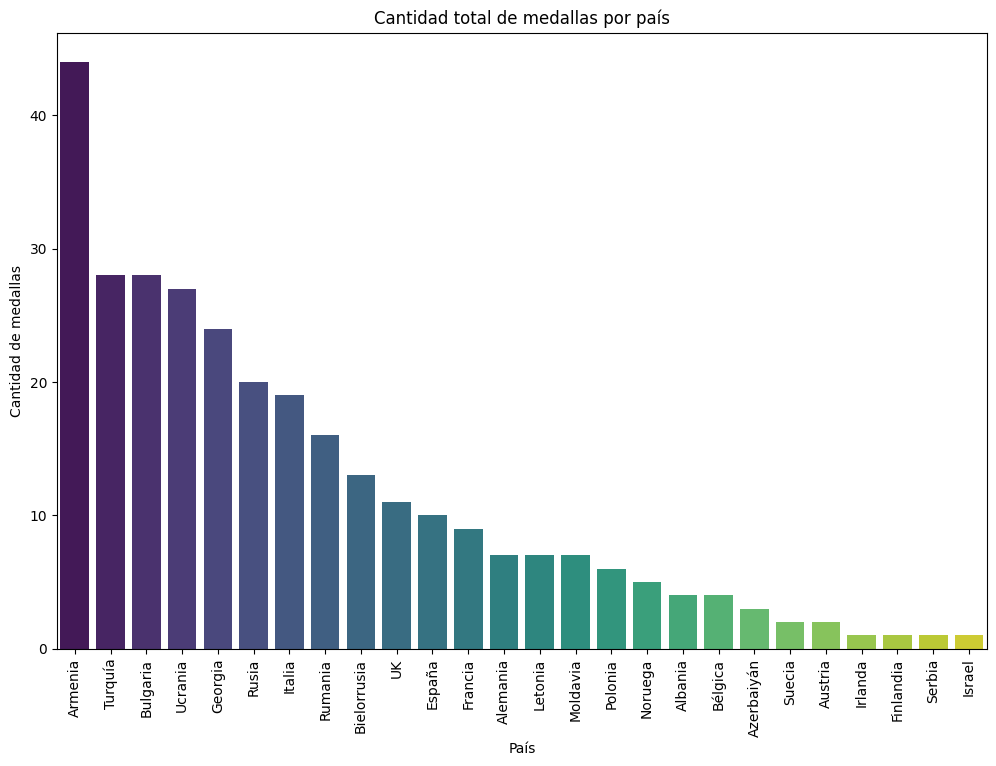

In [177]:
# Agrupar y sumar las medallas por país
medallas_por_pais = df_completo.groupby('País')['Medalla'].count().reset_index(name='Cantidad de Medallas')

# Ordenar los países por cantidad de medallas
medallas_por_pais = medallas_por_pais.sort_values(by='Cantidad de Medallas', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=medallas_por_pais, x='País', y='Cantidad de Medallas', palette='viridis')

# Personalizar el gráfico
plt.title('Cantidad total de medallas por país')
plt.xlabel('País')
plt.ylabel('Cantidad de medallas')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.show()


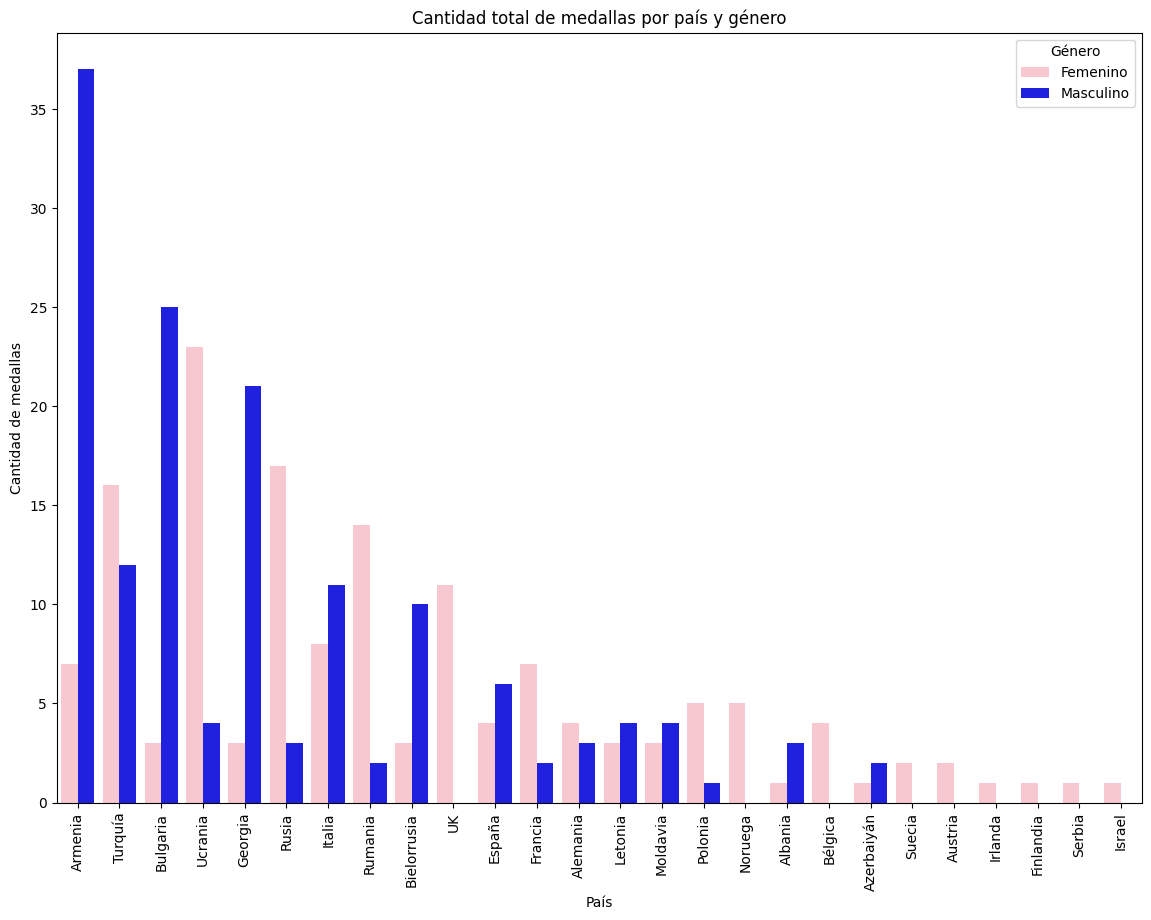

In [180]:
# Agrupar y contar las medallas por país y género
medallas_por_pais_genero = df_completo.groupby(['País', 'Género'])['Medalla'].count().reset_index(name='Cantidad de Medallas')

# Ordenar los países por cantidad de medallas totales
medallas_totales_por_pais = df_completo.groupby('País')['Medalla'].count().reset_index(name='Cantidad de Medallas Totales')
medallas_totales_por_pais = medallas_totales_por_pais.sort_values(by='Cantidad de Medallas Totales', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(14, 10))
sns.barplot(
    data=medallas_por_pais_genero,
    x='País',
    y='Cantidad de Medallas',
    hue='Género',
    palette={'Femenino': 'pink', 'Masculino': 'blue'},
    order=medallas_totales_por_pais['País']
)

# Personalizar el gráfico
plt.title('Cantidad total de medallas por país y género')
plt.xlabel('País')
plt.ylabel('Cantidad de medallas')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.legend(title='Género')
plt.show()


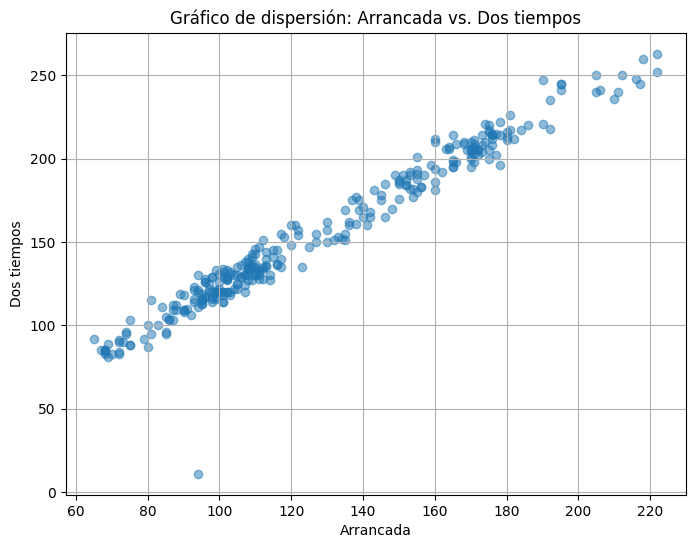

In [179]:
# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df_completo['Arrancada'], df_completo['Dos tiempos'], alpha=0.5)
plt.title('Gráfico de dispersión: Arrancada vs. Dos tiempos')
plt.xlabel('Arrancada')
plt.ylabel('Dos tiempos')
plt.grid(True)
plt.show()


## **Preguntas obligatorias a resolver**

### ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)

In [ ]:
# Contar medallas por país
medallas_por_pais3 = df_completo.groupby(['País', 'Medalla']).size().unstack(fill_value=0)

# Ordenar las columnas por tipo de medalla
medallas_por_pais3 = medallas_por_pais3[['Oro', 'Plata', 'Bronce']]

# Agregar una columna con el total de medallas
medallas_por_pais3['Total'] = medallas_por_pais3.sum(axis=1)

medallas_por_pais3

Medalla,Oro,Plata,Bronce,Total
País,,,,
Albania,1,2,1,4
Alemania,1,3,3,7
Armenia,14,13,17,44
Austria,0,0,2,2
Azerbaiyán,2,0,1,3
Bielorrusia,4,4,5,13
Bulgaria,15,8,5,28
Bélgica,0,2,2,4
España,0,5,5,10


### ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

In [ ]:
# Crear un DataFrame para hombres
df_hombres = df_completo[df_completo['Género'] == 'Masculino']

# Crear un DataFrame para mujeres
df_mujeres = df_completo[df_completo['Género'] == 'Femenino']

# Agrupar y contar medallas por país para hombres
df_hombres_medallas = df_hombres.groupby('País')['Medalla'].count()

# Agrupar y contar medallas por país para mujeres
df_mujeres_medallas = df_mujeres.groupby('País')['Medalla'].count()

# Combinar ambos DataFrames y llenar los valores faltantes con cero
df_medallas_por_pais = pd.concat([df_hombres_medallas, df_mujeres_medallas], axis=1, keys=['Hombres', 'Mujeres']).fillna(0)

# Calcular la diferencia en cantidad de medallas entre hombres y mujeres
df_medallas_por_pais['Diferencia'] = abs(df_medallas_por_pais['Hombres'] - df_medallas_por_pais['Mujeres'])

# Ordenar los países por la diferencia absoluta
paises_mayor_equidad = df_medallas_por_pais['Diferencia'].nsmallest(3)

print("Los tres países con mayor equidad en términos de éxito entre sus atletas femeninos y masculinos son:")
for pais, diferencia in paises_mayor_equidad.items():
    print(f"{pais} con una diferencia absoluta de {diferencia} medallas.")


Los tres países con mayor equidad en términos de éxito entre sus atletas femeninos y masculinos son:
Alemania con una diferencia absoluta de 1.0 medallas.
Azerbaiyán con una diferencia absoluta de 1.0 medallas.
Letonia con una diferencia absoluta de 1.0 medallas.


### ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

In [ ]:
# Calcular el promedio de puntos totales para atletas femeninos y masculinos en cada país
promedio_por_pais = df_completo.groupby(['País', 'Género'])['Total'].mean().unstack()

# Calcular la diferencia absoluta entre los promedios
promedio_por_pais['Diferencia_absoluta'] = abs(promedio_por_pais['Femenino'] - promedio_por_pais['Masculino'])

# Encontrar el país donde la diferencia absoluta es mínima
pais_min_diferencia = promedio_por_pais['Diferencia_absoluta'].idxmin()
min_diferencia_absoluta = promedio_por_pais.loc[pais_min_diferencia]['Diferencia_absoluta']

print(f"El país donde los promedios de puntos totales conseguidos por atletas femeninos y masculinos son más cercanos es {pais_min_diferencia}, con una diferencia de {min_diferencia_absoluta} puntos.")


El país donde los promedios de puntos totales conseguidos por atletas femeninos y masculinos son más cercanos es Rumania, con una diferencia de 36.78571428571428 puntos.
